In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np


In [2]:
device = 'cuda'
batch_size = 128
transform = transforms.Compose(
    [transforms.ToTensor(),
     # transforms.Resize(16)
    ])

train_set = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.KMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0)



In [3]:
# Defining Gaussian-Bernoulli RBM
class RBM(nn.Module):
    """Restricted Boltzmann Machine template."""
    
    def __init__(self, D: int, F: int, k: int):
        """Creates an instance RBM module.
            
            Args:
                D: Size of the input data.
                F: Size of the hidden variable.
                k: Number of MCMC iterations for negative sampling.
                
            The function initializes the weight (W) and biases (c & b).
        """
        super().__init__()
        self.W = nn.Parameter(torch.randn(F, D) * 1e-2) # Initialized from Normal(mean=0.0, variance=1e-4)
        self.c = nn.Parameter(torch.zeros(D)) # Initialized as 0.0
        self.b = nn.Parameter(torch.zeros(F)) # Initilaized as 0.0
        self.k = k
    
    def sample(self, p):
        """Sample from a bernoulli distribution defined by a given parameter."""
        pass
    
    
    def sample_gaussian(self, p):
        """Sample from a bernoulli distribution defined by a given parameter."""
        pass
        
    def P_h_x(self, x):
        """Returns the conditional P(h|x).""" 
        pass
    
    def P_x_h(self, h):
        """Returns the conditional P(x|h). """
        pass
        
    def free_energy(self, x):
        """Returns the Average F(x) free energy. (Slide 11)."""
        pass
        
    def forward(self, x):
        """Generates x_negative using MCMC Gibbs sampling starting from x. 
        Your CD-k algorithm should be implemented here"""
        
        #ADD SOMETHING HERE

        
        for _ in range(self.k):
            # Complete your CD-K here

            
        return x_negative, pxh_k

IndentationError: expected an indented block after 'for' statement on line 49 (1386603999.py, line 53)

In [4]:
def train(model, device, train_loader, optimizer, epoch):
    
    train_loss = 0
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):

        # flatten and pre-process variable
        data = data.view(data.size(0),-1).to(device) 
        mean, std = data.mean(), data.std()
        data = (data - mean)/std
        optimizer.zero_grad()
        
        #################TODO#######################
        # positive and netative phase and approximating the loss: -log(p(x))
        # Note that the computing of loss_fn can occassionally be negative
        # becasue since we used a sampling approach for estimation 
        # (slide 26)
        #############################################
        
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
        if (batch_idx+1) % (len(train_loader)//2) == 0:
            print('Train({})[{:.0f}%]: Loss: {:.4f}'.format(
                epoch, 100. * batch_idx / len(train_loader), train_loss/(batch_idx+1)))

def test(model, device, test_loader, epoch):
    
    model.eval()
    test_loss = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data = data.view(data.size(0),-1).to(device)
      
            mean, std = data.mean(), data.std()
            data = (data - mean)/std
            #####################FIXME############
            #Complete the CD-k process and estimate -log(p(x))
            ########################################

            test_loss += loss.item() # sum up batch loss
    
    test_loss = (test_loss*batch_size)/len(test_loader.dataset)
    print('Test({}): Loss: {:.4f}'.format(epoch, test_loss))

In [5]:
def show(img1, img2):
    npimg1 = img1.cpu().numpy()
    npimg2 = img2.cpu().numpy()
    
    fig, axes = plt.subplots(1,2, figsize=(20,10))
    axes[0].imshow(np.transpose(npimg1, (1,2,0)), interpolation='nearest')
    axes[1].imshow(np.transpose(npimg2, (1,2,0)), interpolation='nearest')
    fig.show()

In [ ]:
# Sample Code 

seed = 42
num_epochs = 25
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
M = [16, 64, 256]

rbm = RBM(D=28 * 28 * 1, F=M[0], k=5).to(device)
#Keep the lr small to avoid overflow
optimizer = optim.Adam(rbm.parameters(), lr=1e-3)
print("M = {}:".format(M[0]))
for epoch in range(1, num_epochs + 1):
    train(rbm, device, train_loader, optimizer, epoch)
    test(rbm, device, test_loader, epoch)

    # reconstructing samples for plotting
    data, _ = next(iter(test_loader))
    data = data[:32]
    data_size = data.size()
    data = data.view(data.size(0), -1).to(device)
    mean, std = data.mean(), data.std()
    bdata = (data - mean) / std
    vh_k, pvh_k = rbm(bdata)
    vh_k, pvh_k = vh_k.detach(), pvh_k.detach()
    
    show(make_grid(data.reshape(data_size), padding=0), make_grid(pvh_k.reshape(data_size).clip(min=0,max=1), padding=0))
    plt.show()

    print('Optimizer Learning rate: {0:.4f}\n'.format(optimizer.param_groups[0]['lr']))


Using device: mps

======================== Training RBM with M = 16 ========================



====> Epoch: 1 Average loss: 43.8035


====> Test set loss: 39.6352


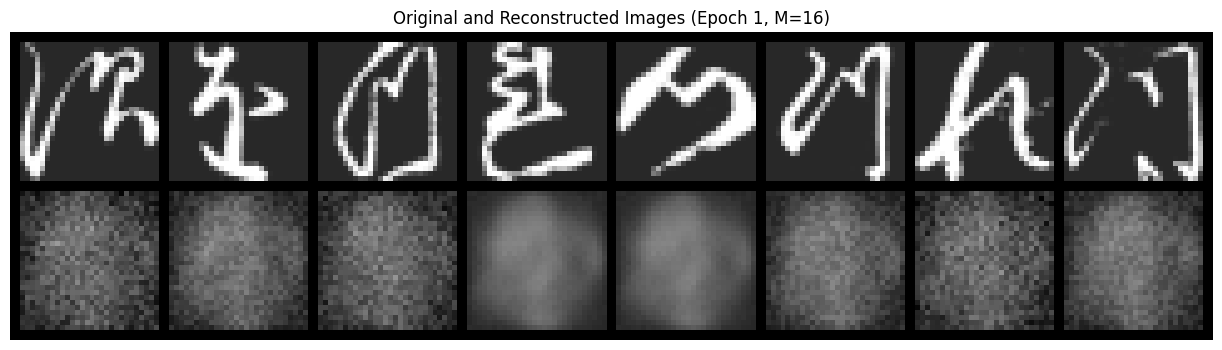

====> Epoch: 2 Average loss: 41.0374


====> Test set loss: 39.5606


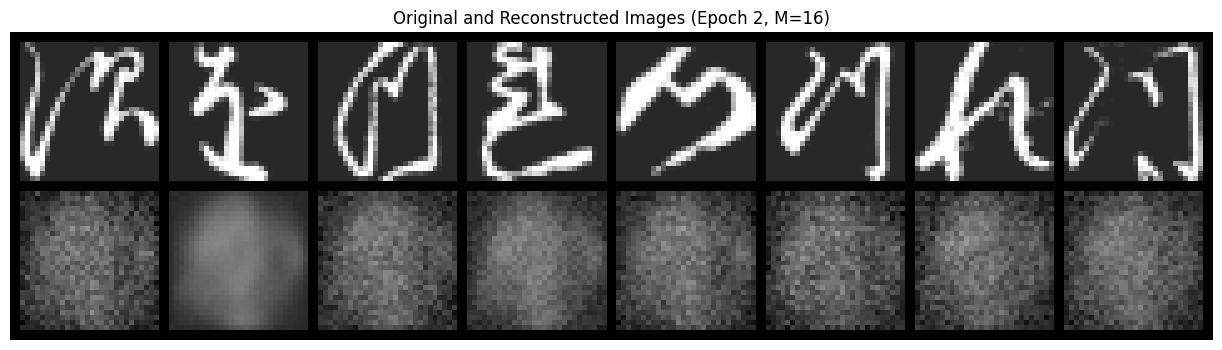

====> Epoch: 3 Average loss: 40.8985


====> Test set loss: 39.3701


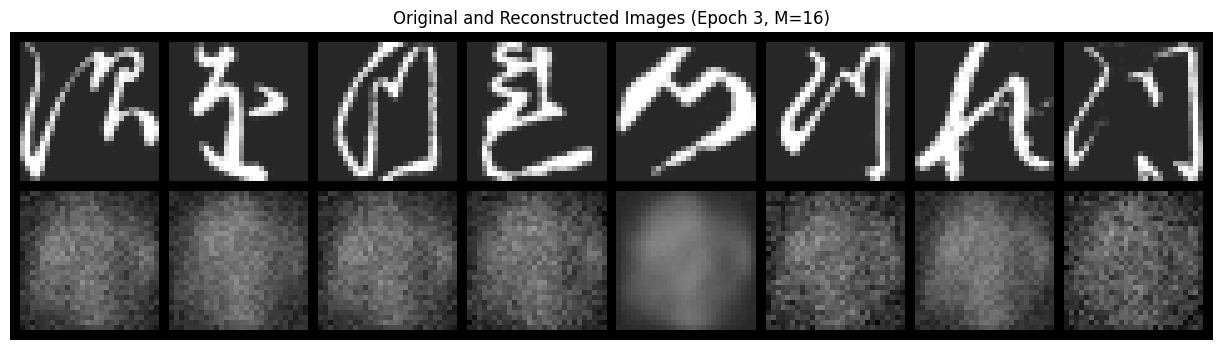

====> Epoch: 4 Average loss: 40.5117


====> Test set loss: 38.8213


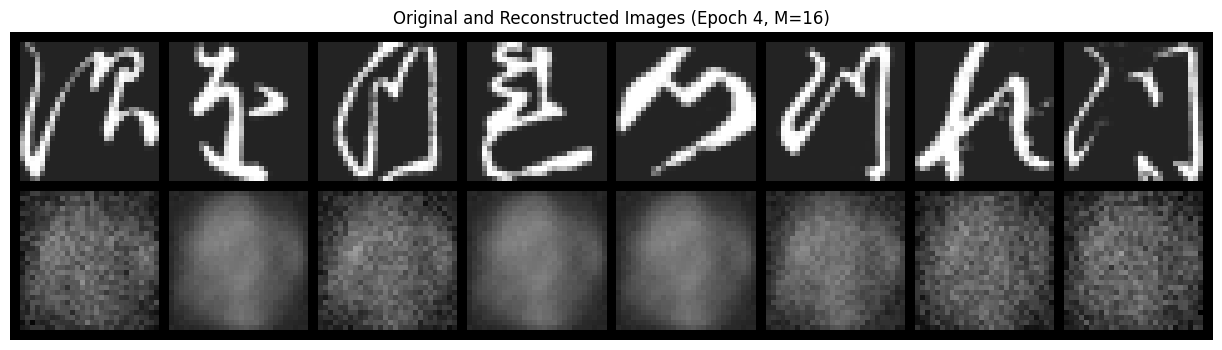

====> Epoch: 5 Average loss: 39.5984


====> Test set loss: 37.8418


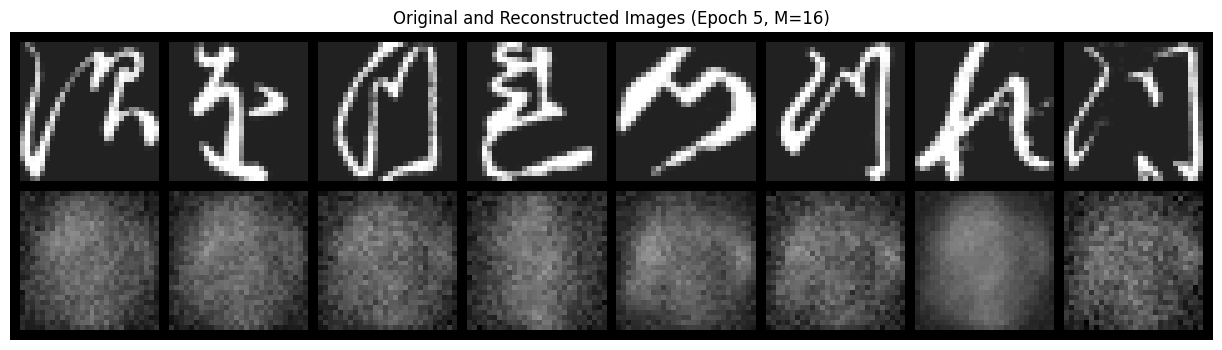

====> Epoch: 6 Average loss: 38.5044


====> Test set loss: 37.0331


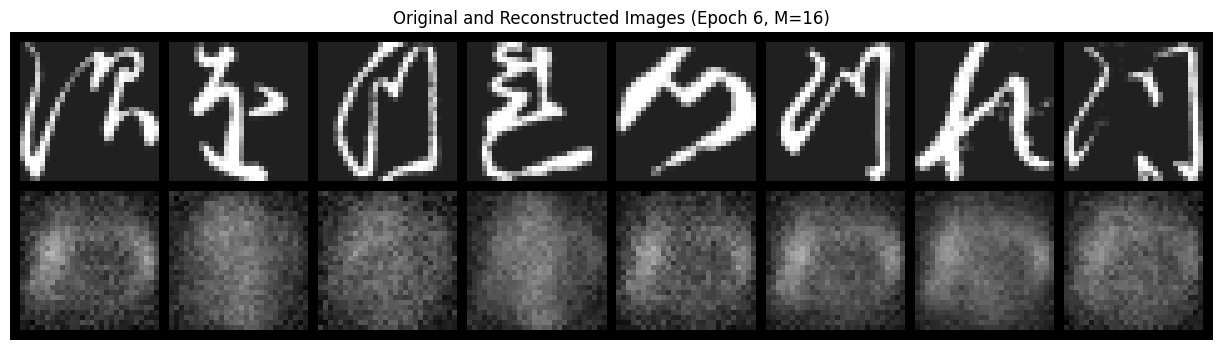

====> Epoch: 7 Average loss: 37.7701


====> Test set loss: 36.5617


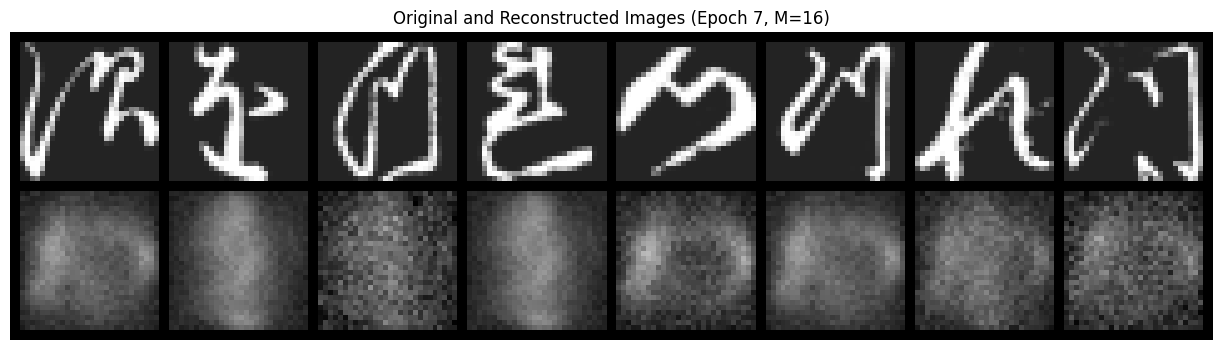

====> Epoch: 8 Average loss: 37.3465


====> Test set loss: 36.2806


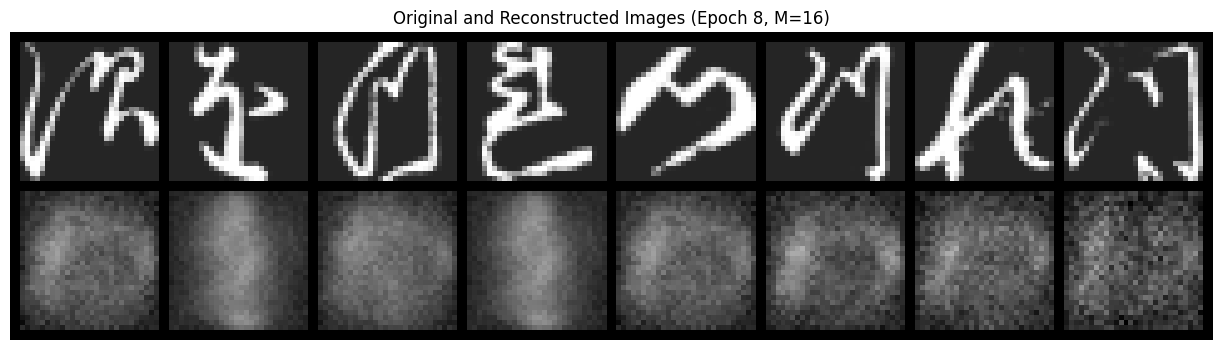

====> Epoch: 9 Average loss: 37.0975


====> Test set loss: 36.1140


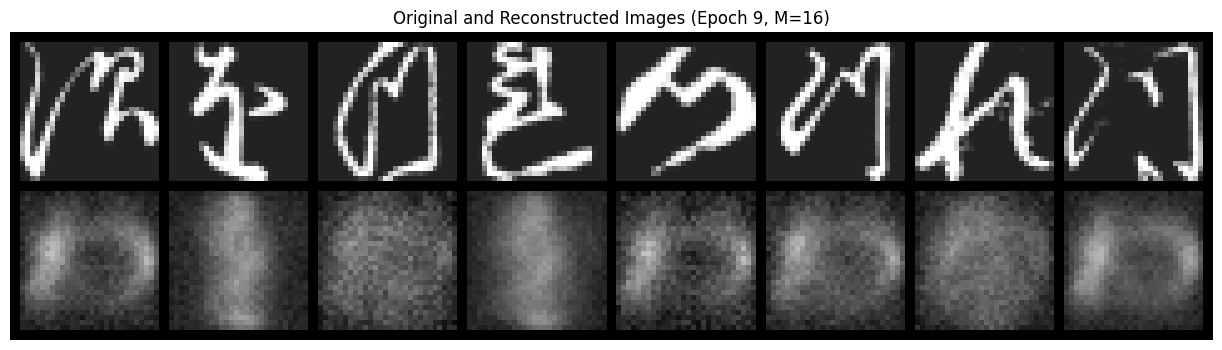

====> Epoch: 10 Average loss: 36.9099


====> Test set loss: 35.9757


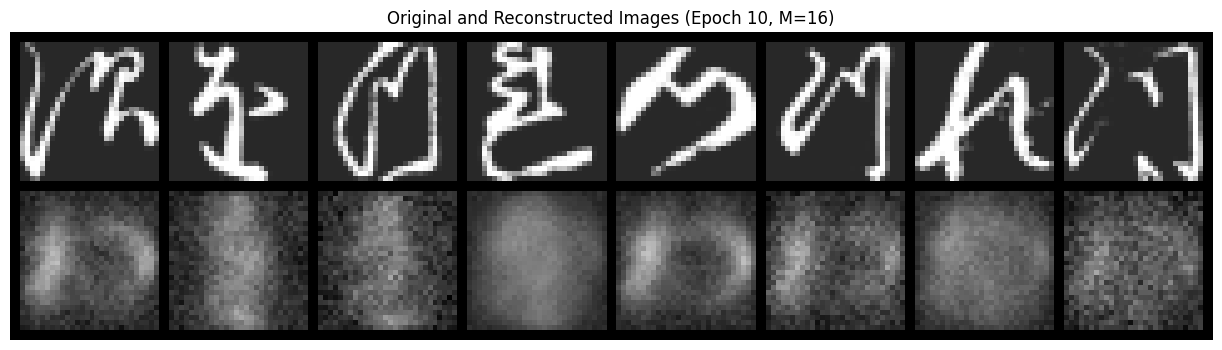

====> Epoch: 11 Average loss: 36.7499


====> Test set loss: 35.8448


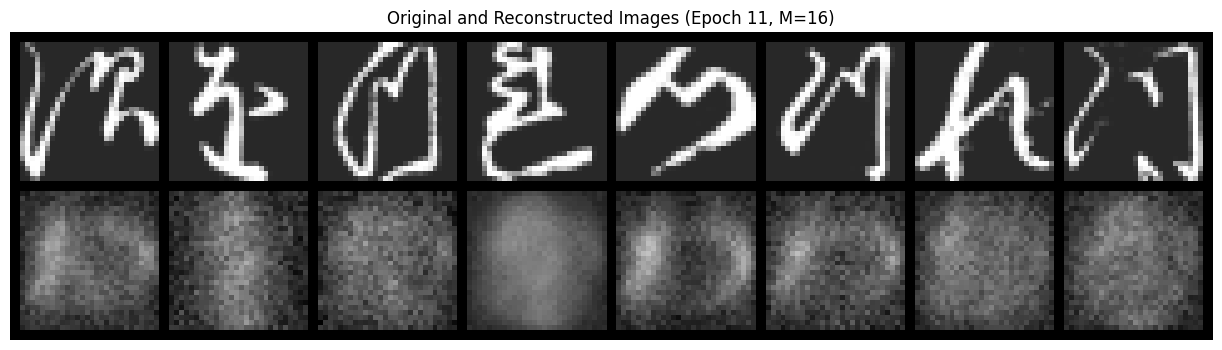

====> Epoch: 12 Average loss: 36.5990


====> Test set loss: 35.6895


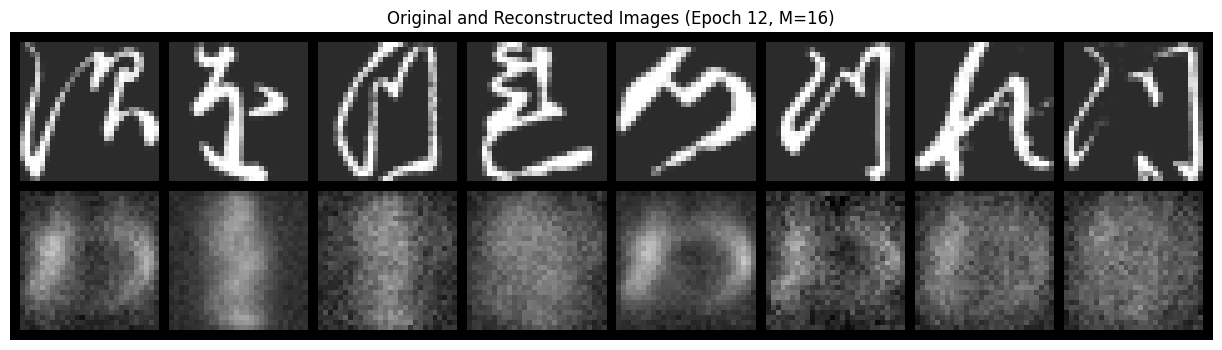

====> Epoch: 13 Average loss: 36.4384


====> Test set loss: 35.5526


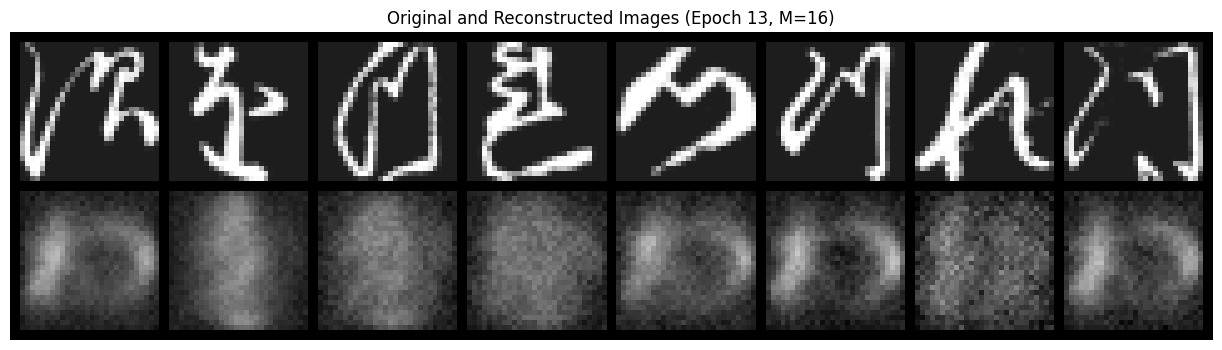

====> Epoch: 14 Average loss: 36.2450


====> Test set loss: 35.3835


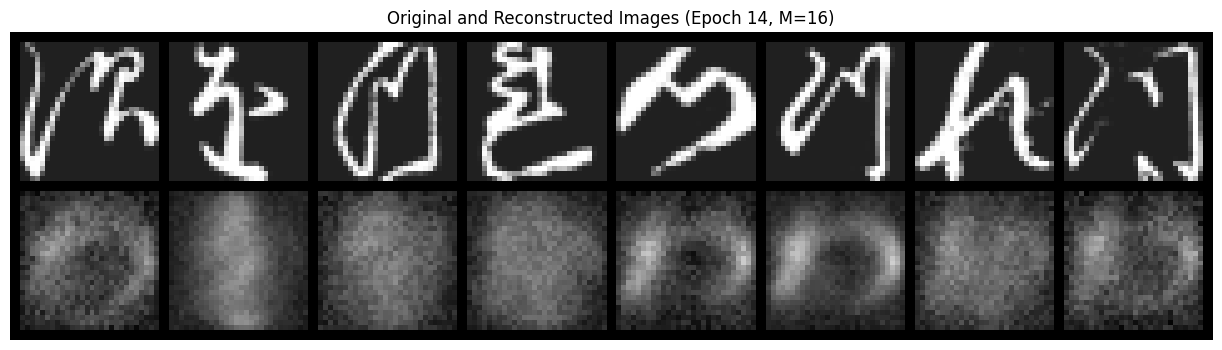

====> Epoch: 15 Average loss: 36.0260


====> Test set loss: 35.1761


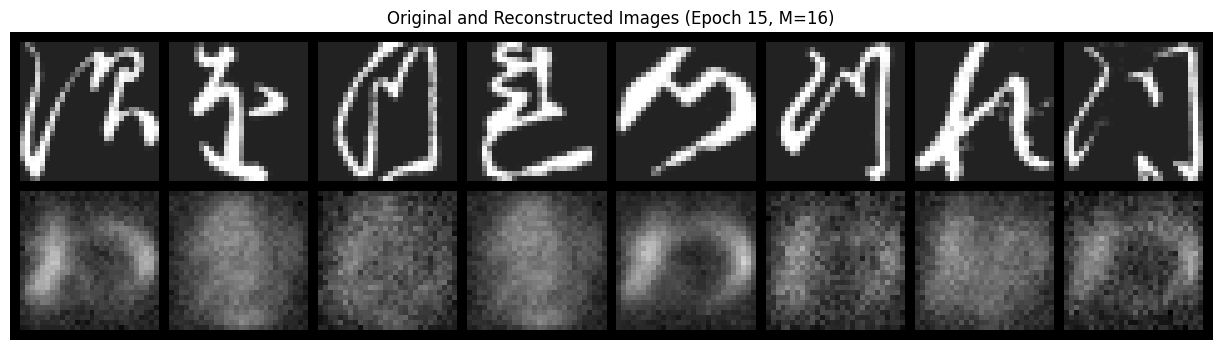

====> Epoch: 16 Average loss: 35.7749


====> Test set loss: 34.9416


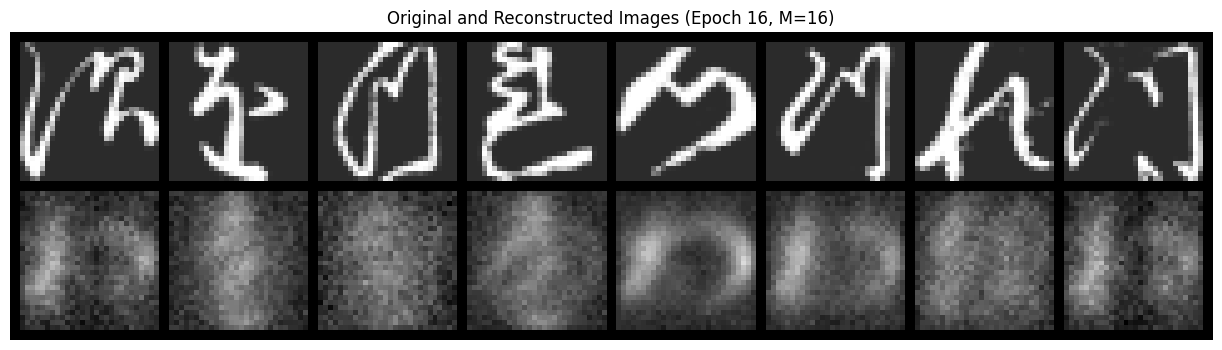

====> Epoch: 17 Average loss: 35.5013


====> Test set loss: 34.7213


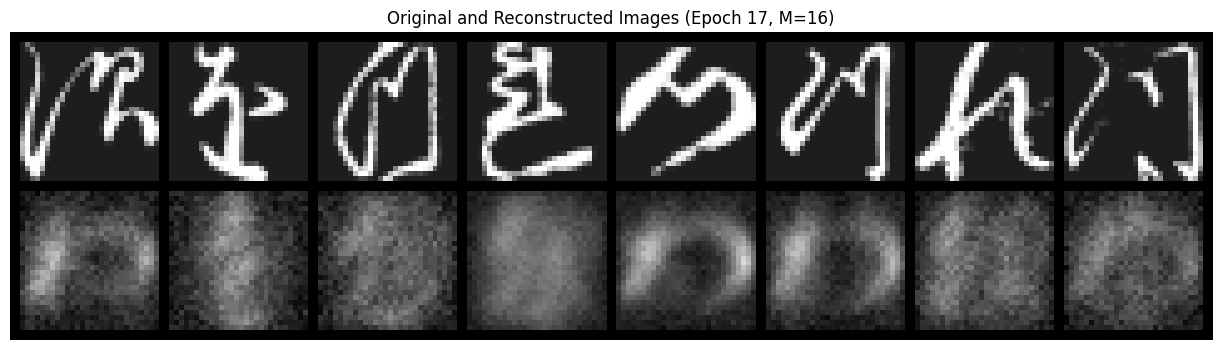

====> Epoch: 18 Average loss: 35.2091


====> Test set loss: 34.4627


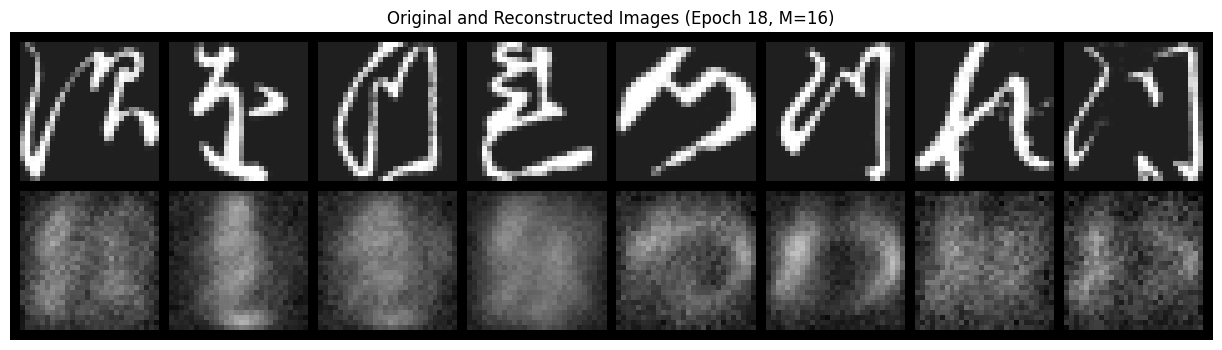

====> Epoch: 19 Average loss: 34.9197


====> Test set loss: 34.2115


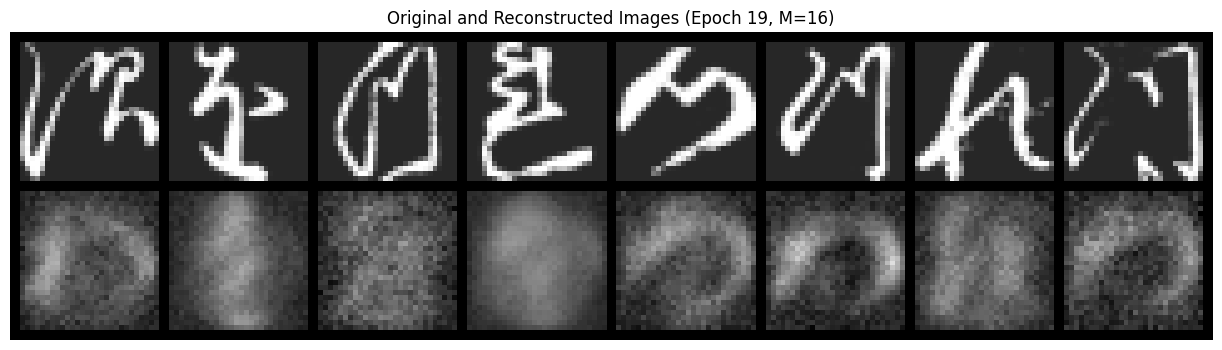

====> Epoch: 20 Average loss: 34.6311


====> Test set loss: 33.9987


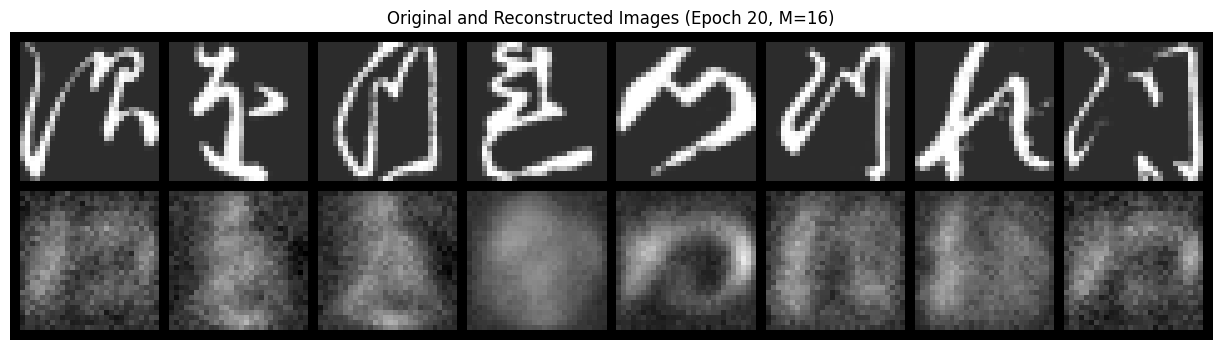

====> Epoch: 21 Average loss: 34.3544


====> Test set loss: 33.7512


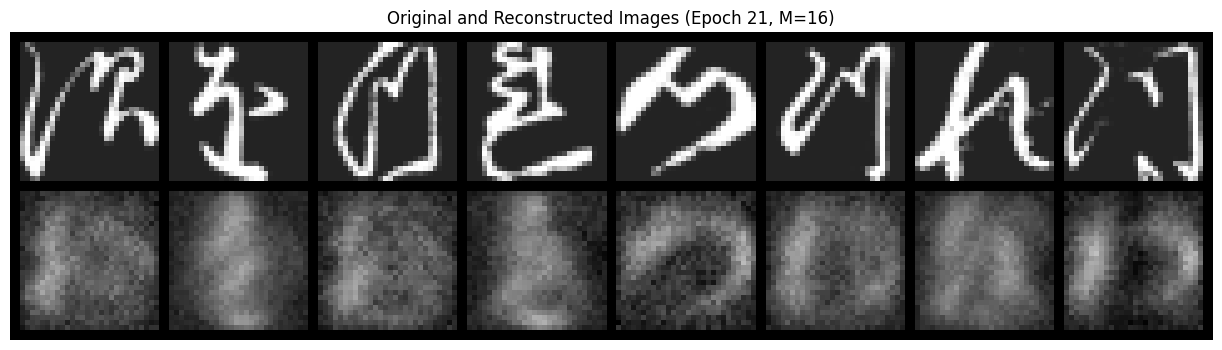

====> Epoch: 22 Average loss: 34.1035


====> Test set loss: 33.5393


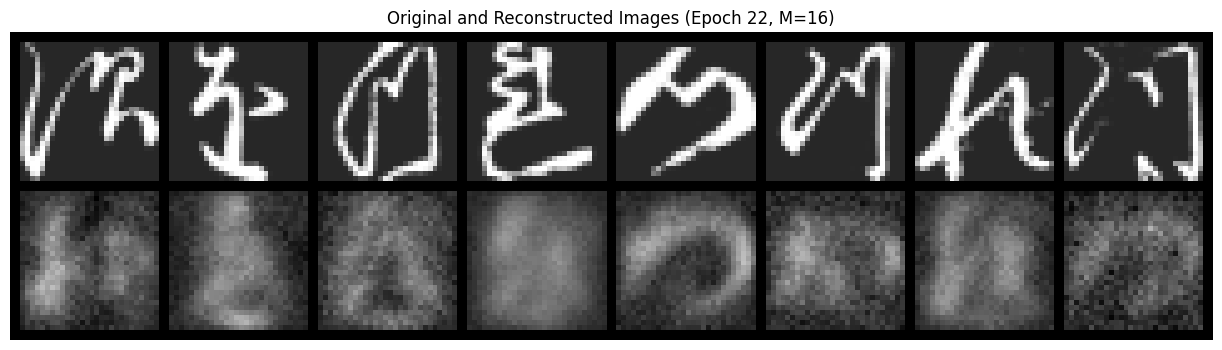

====> Epoch: 23 Average loss: 33.8653


====> Test set loss: 33.3248


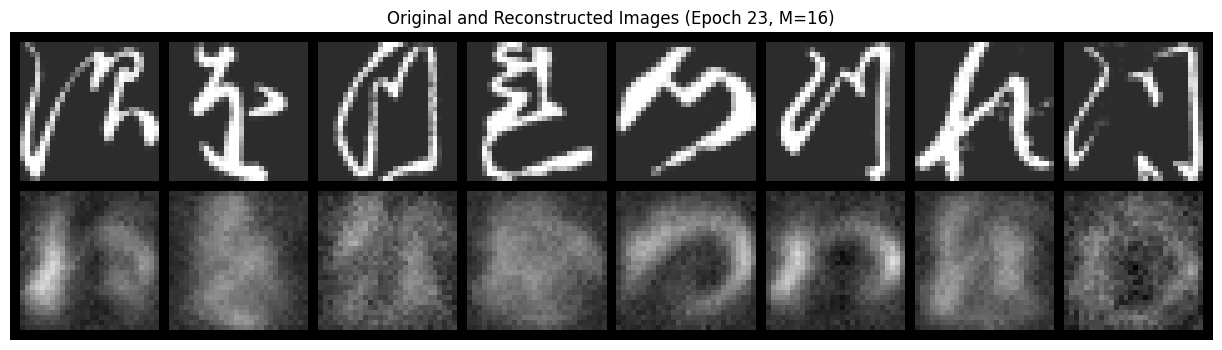

====> Epoch: 24 Average loss: 33.6296


====> Test set loss: 33.1667


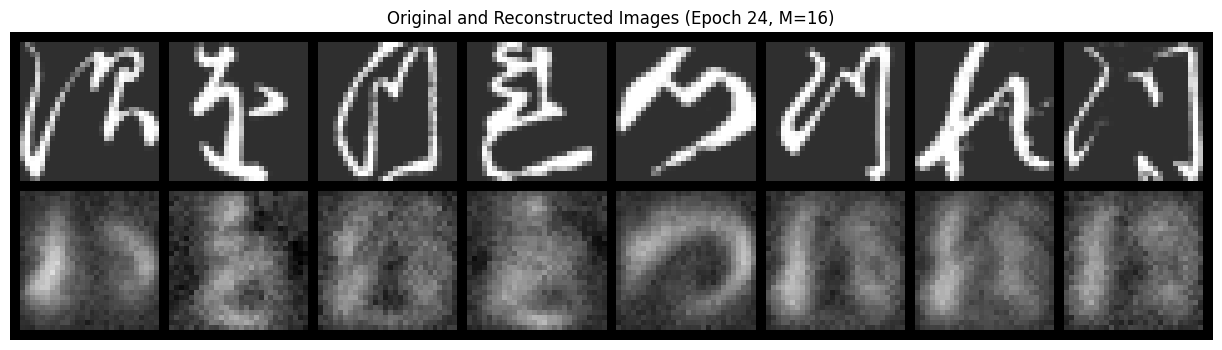

====> Epoch: 25 Average loss: 33.4170


====> Test set loss: 32.9549


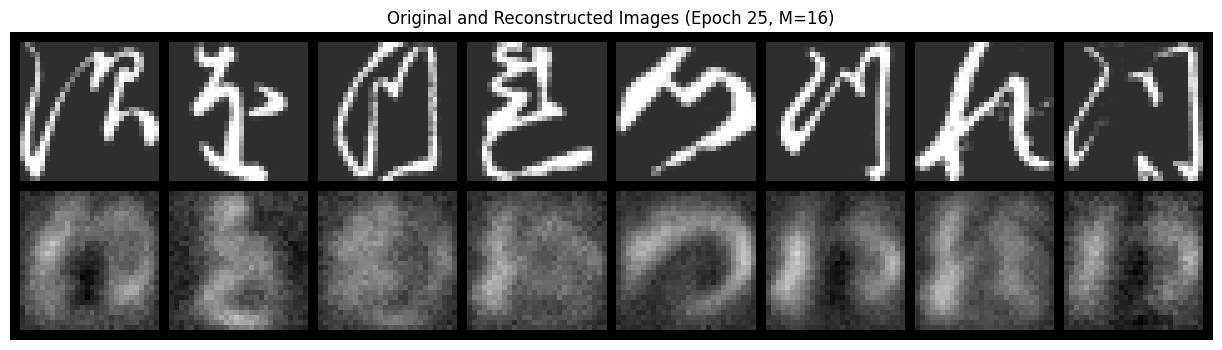

RBM with M=16: Train MSE: 70.3634, Test MSE: 70.0651


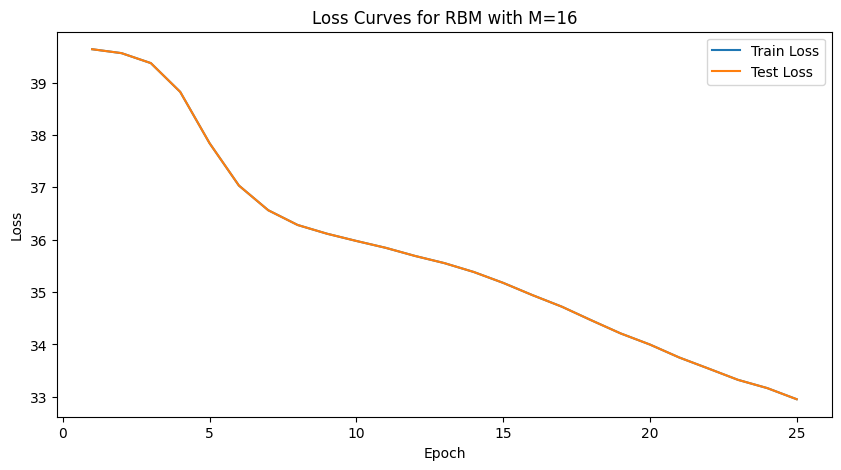

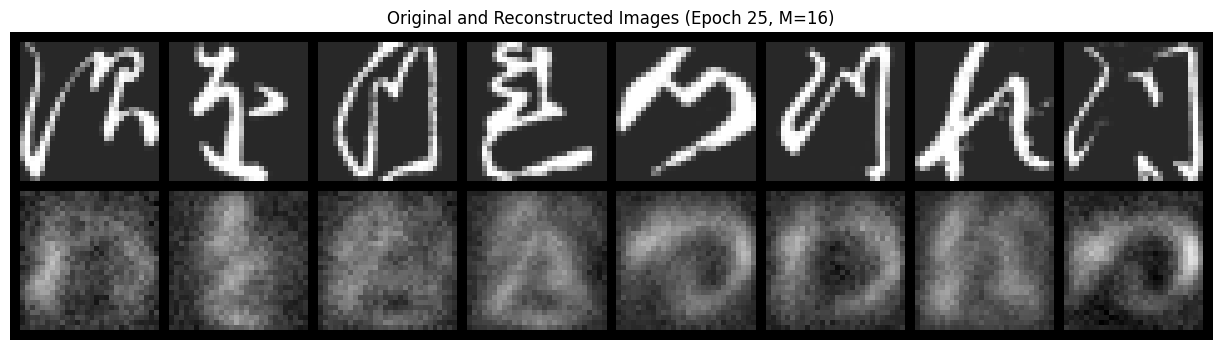

Learning rate: 0.0010


======================== Training RBM with M = 64 ========================



====> Epoch: 1 Average loss: 35.3865


====> Test set loss: 32.0342


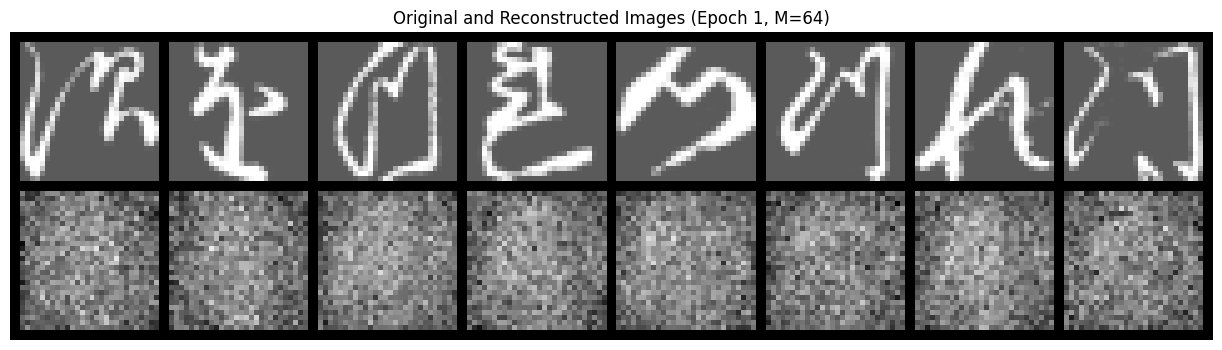

====> Epoch: 2 Average loss: 32.5481


====> Test set loss: 30.5384


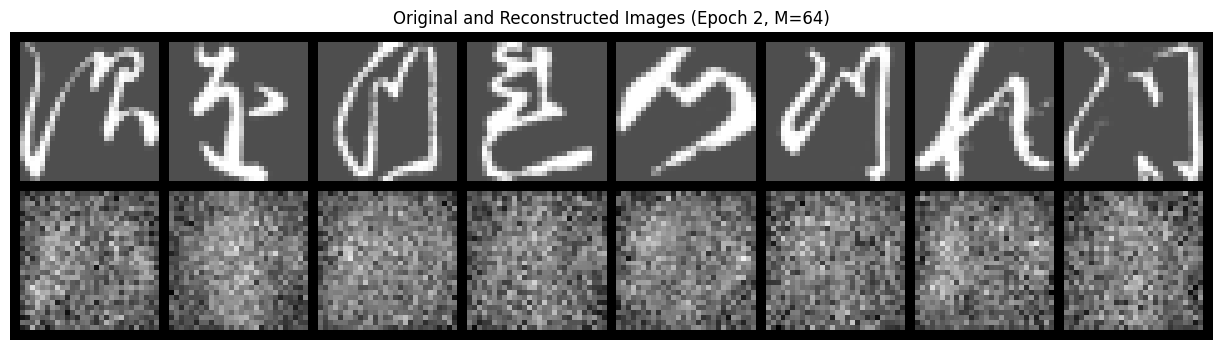

====> Epoch: 3 Average loss: 30.7852


====> Test set loss: 29.3303


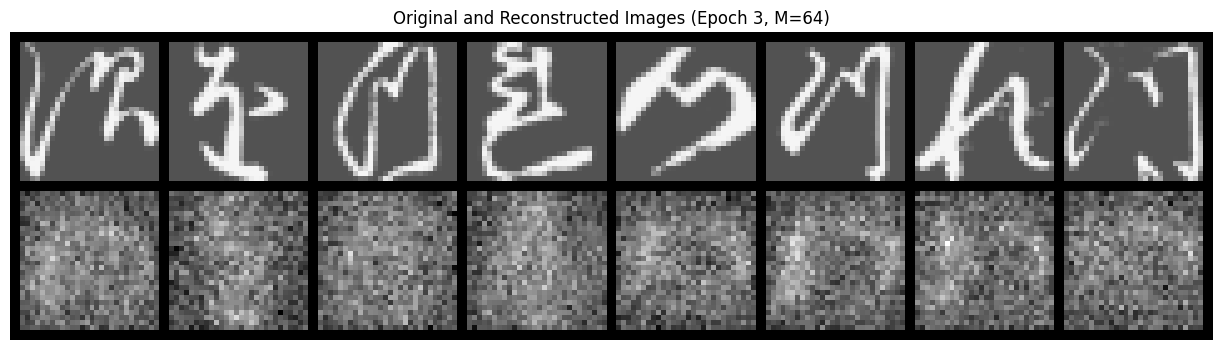

====> Epoch: 4 Average loss: 29.8332


====> Test set loss: 28.8116


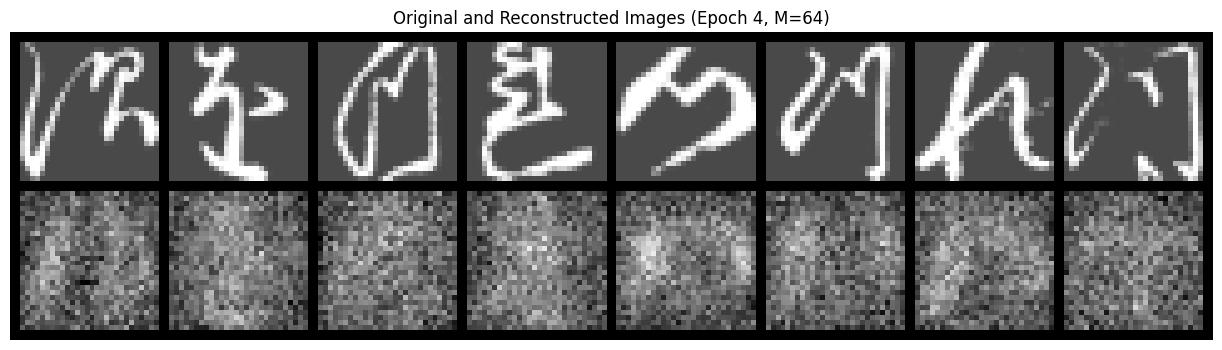

====> Epoch: 5 Average loss: 29.2309


====> Test set loss: 28.2613


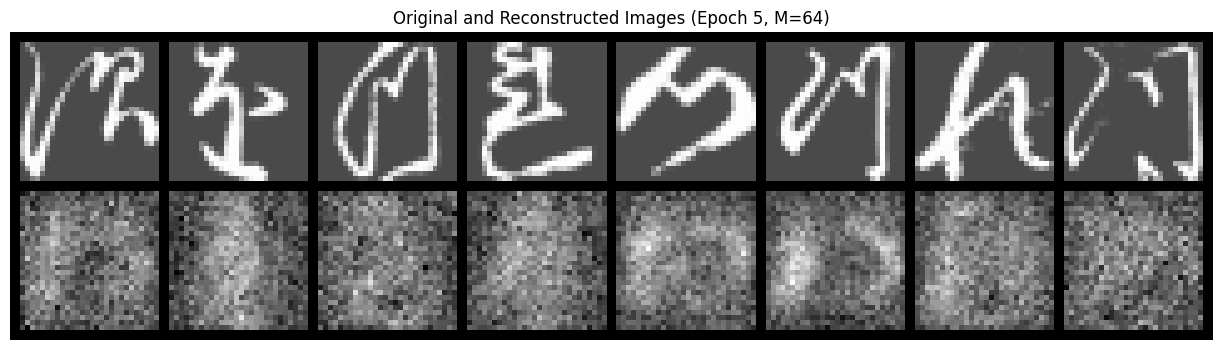

====> Epoch: 6 Average loss: 28.5948


====> Test set loss: 27.6804


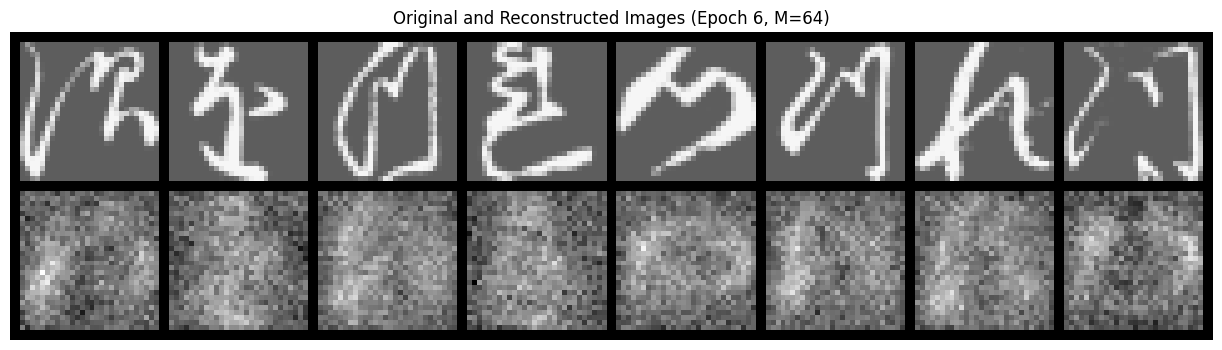

====> Epoch: 7 Average loss: 27.9423


====> Test set loss: 27.1892


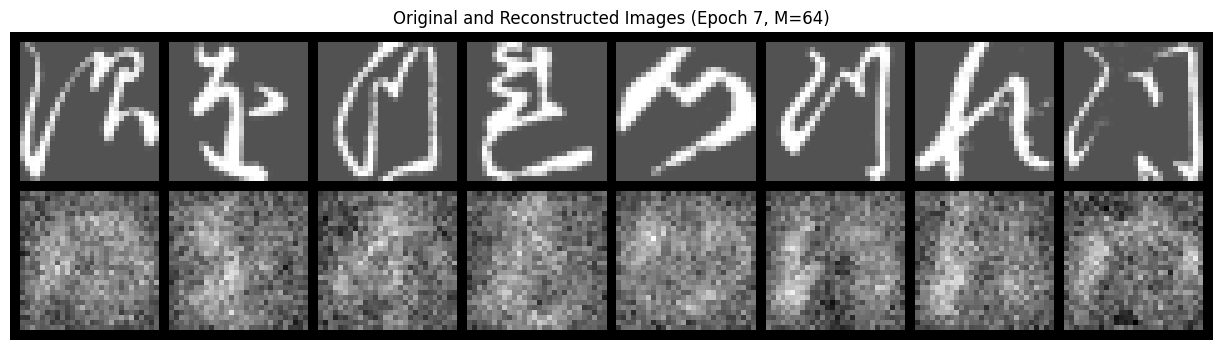

====> Epoch: 8 Average loss: 27.3213


====> Test set loss: 26.7197


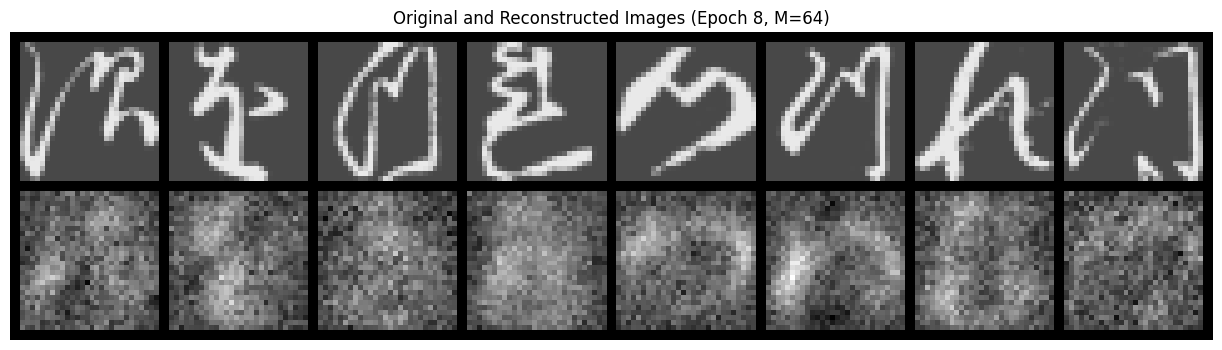

====> Epoch: 9 Average loss: 26.7861


====> Test set loss: 26.3148


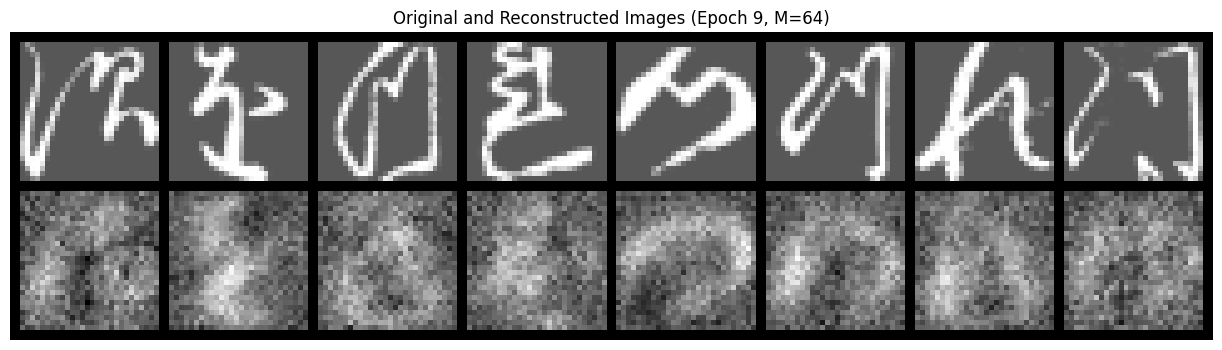

====> Epoch: 10 Average loss: 26.3128


====> Test set loss: 25.9686


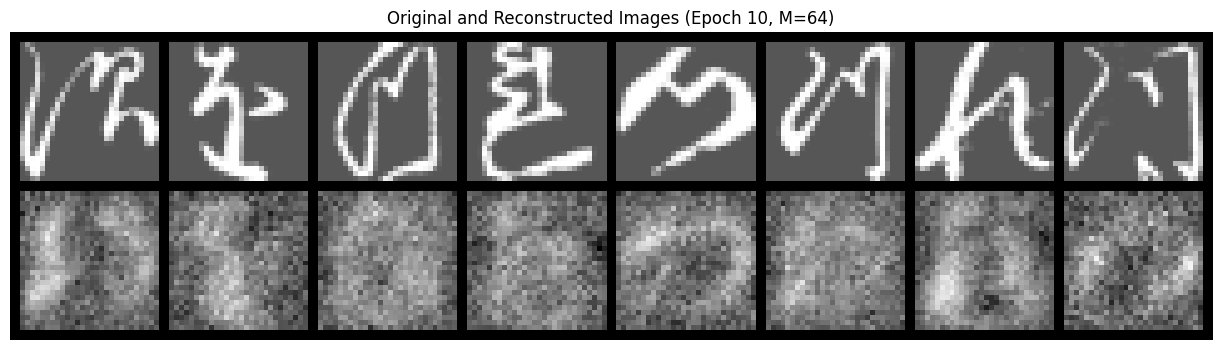

====> Epoch: 11 Average loss: 25.9079


====> Test set loss: 25.6583


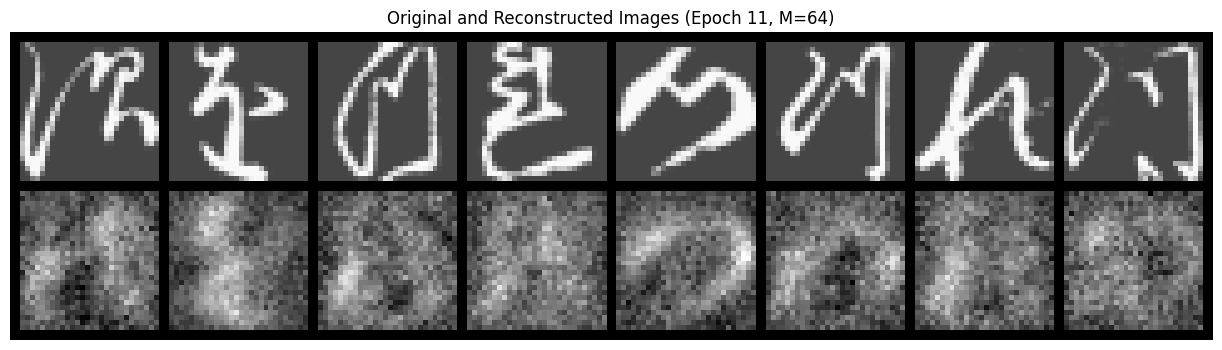

====> Epoch: 12 Average loss: 25.5365


====> Test set loss: 25.3735


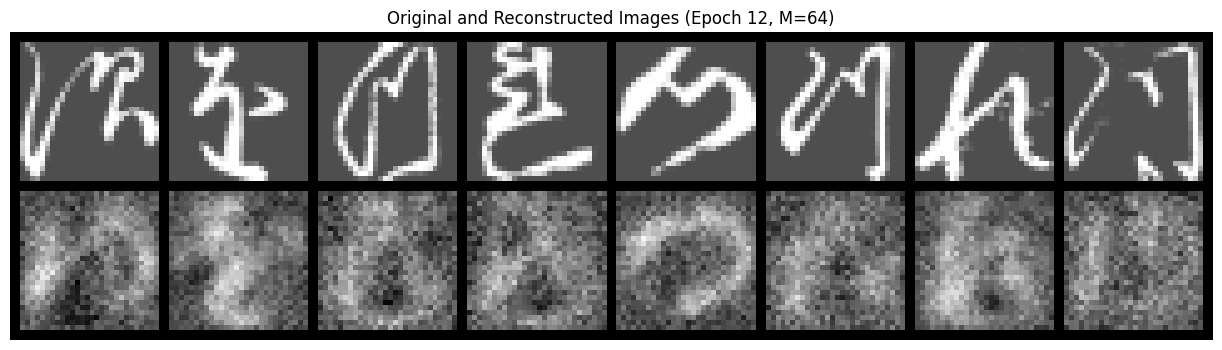

====> Epoch: 13 Average loss: 25.2036


====> Test set loss: 25.0815


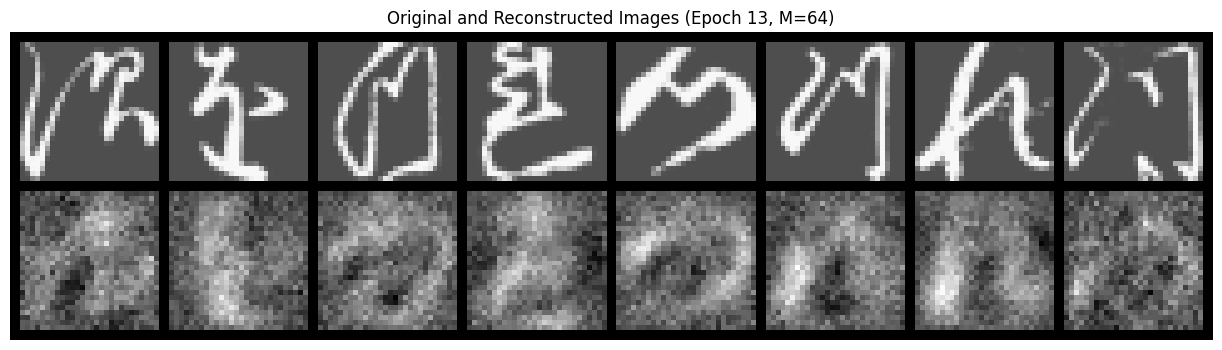

====> Epoch: 14 Average loss: 24.8933


====> Test set loss: 24.8545


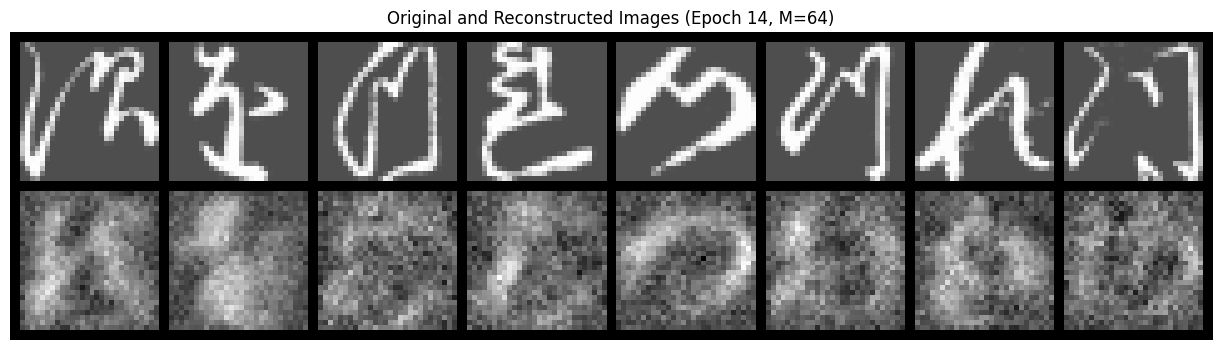

====> Epoch: 15 Average loss: 24.5975


====> Test set loss: 24.6083


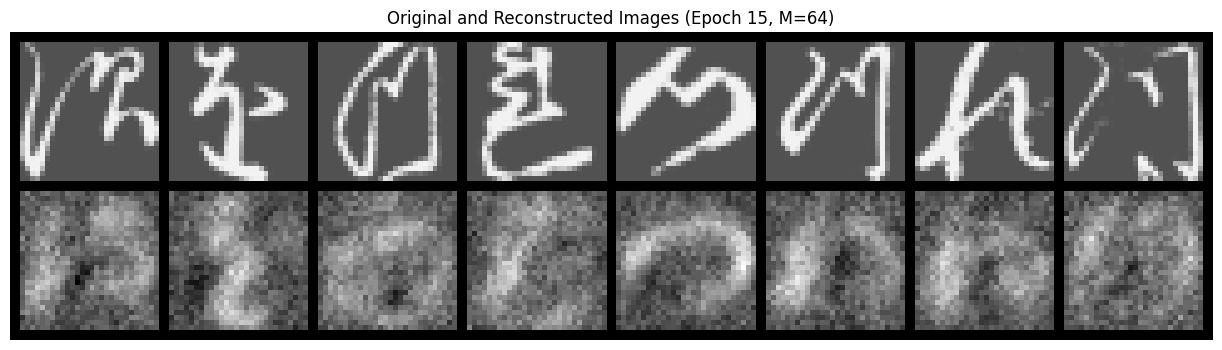

====> Epoch: 16 Average loss: 24.3257


====> Test set loss: 24.3798


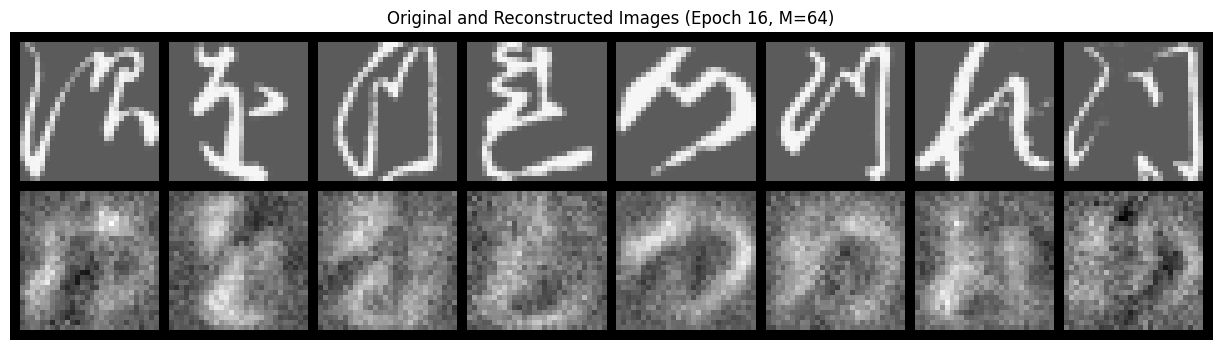

====> Epoch: 17 Average loss: 24.0595


====> Test set loss: 24.1617


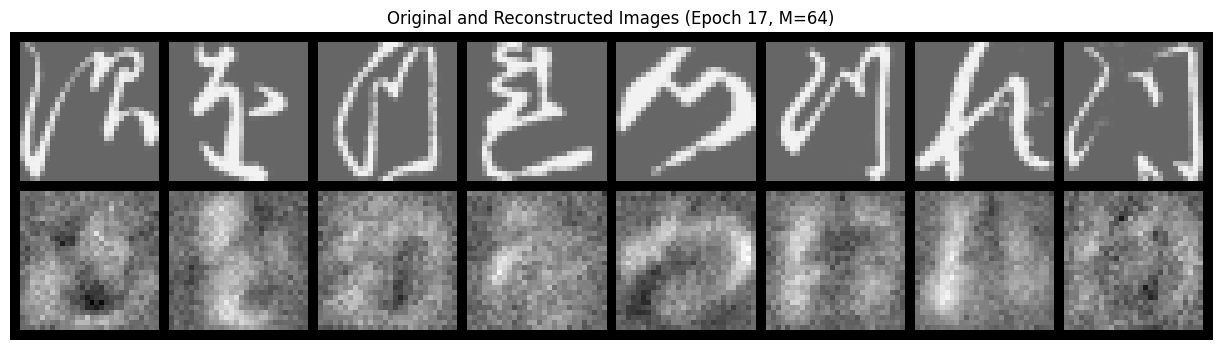

====> Epoch: 18 Average loss: 23.8101


====> Test set loss: 23.9462


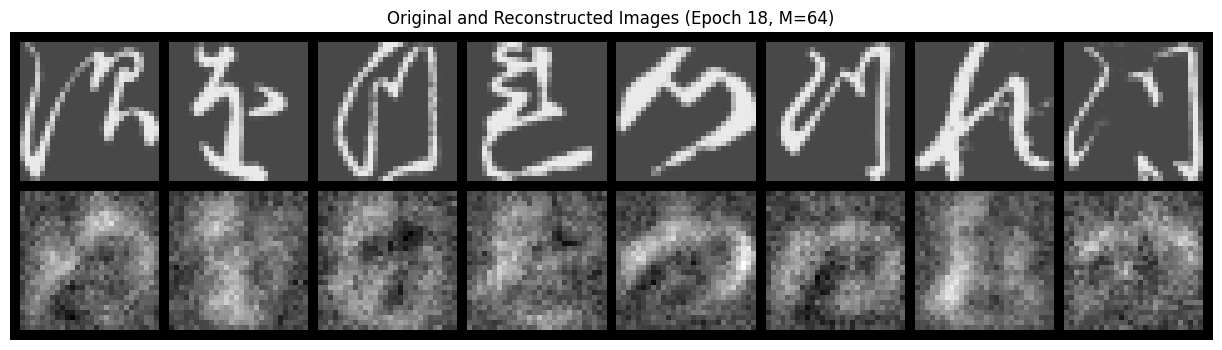

====> Epoch: 19 Average loss: 23.5733


====> Test set loss: 23.7524


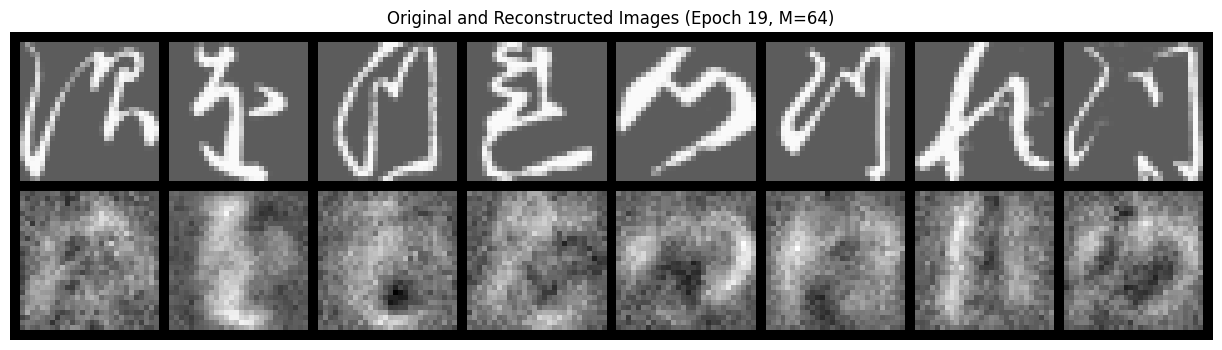

====> Epoch: 20 Average loss: 23.3351


====> Test set loss: 23.5366


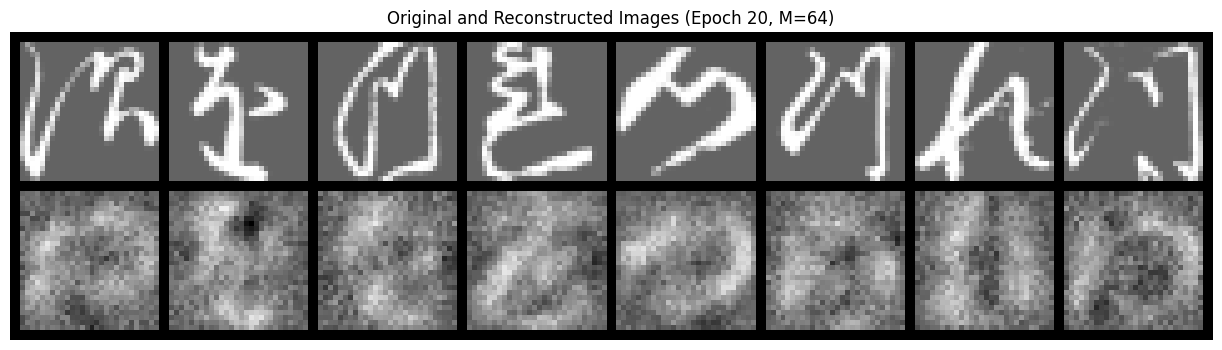

====> Epoch: 21 Average loss: 23.1159


====> Test set loss: 23.3474


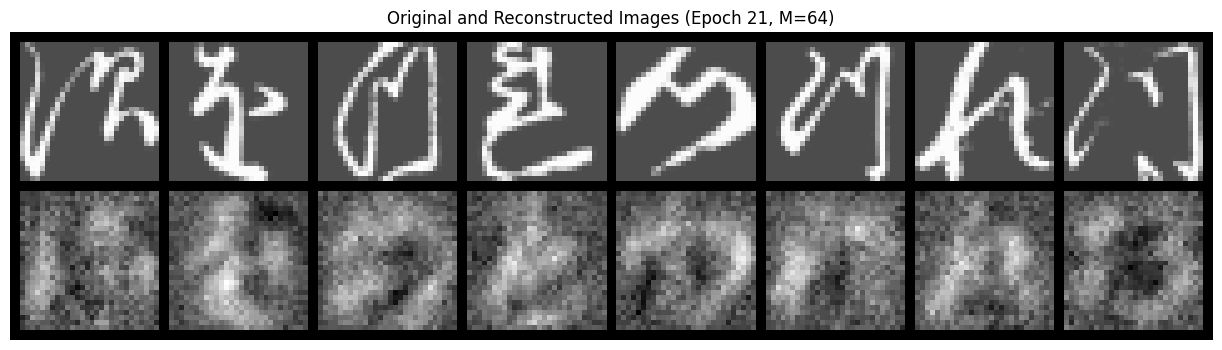

====> Epoch: 22 Average loss: 22.8946


====> Test set loss: 23.1546


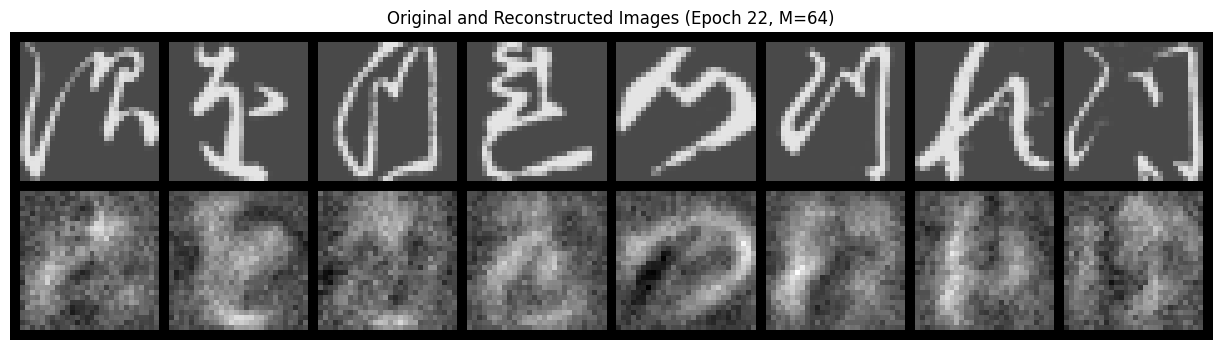

====> Epoch: 23 Average loss: 22.6930


====> Test set loss: 22.9853


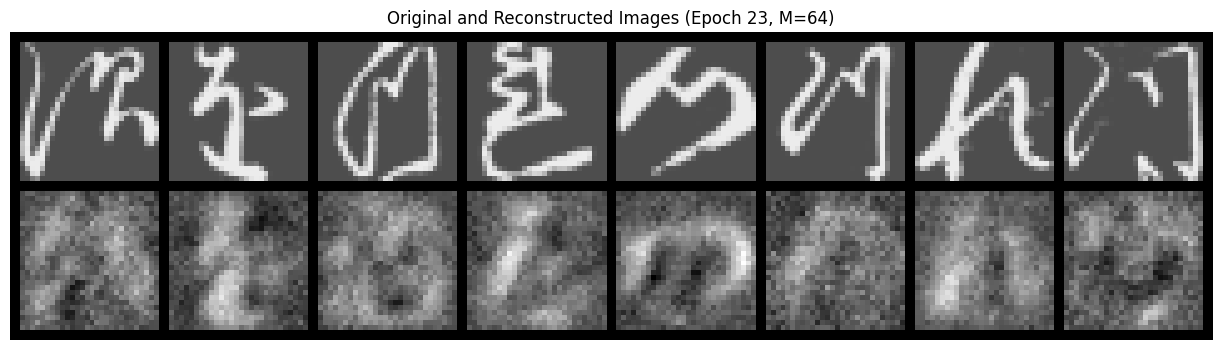

====> Epoch: 24 Average loss: 22.4955


====> Test set loss: 22.8061


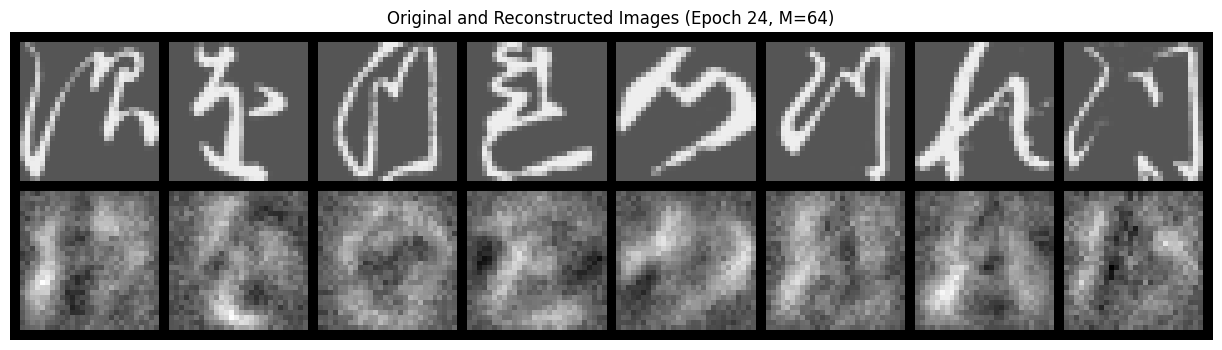

====> Epoch: 25 Average loss: 22.3121


====> Test set loss: 22.6551


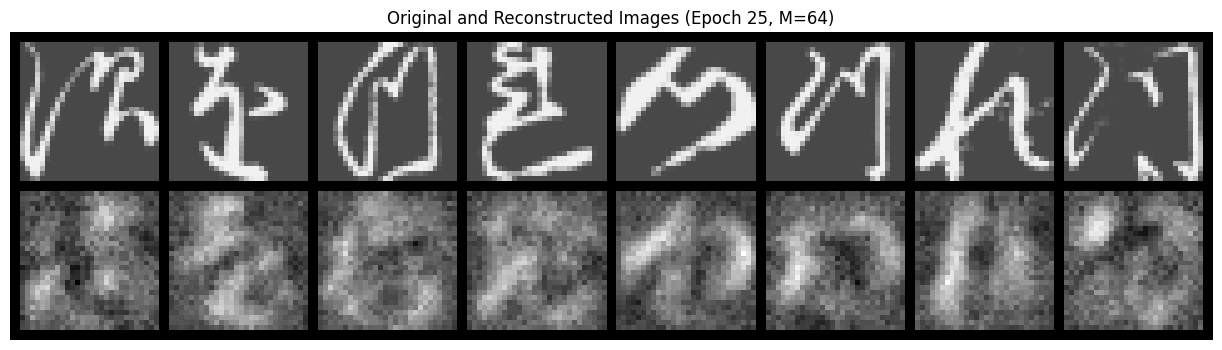

RBM with M=64: Train MSE: 65.0955, Test MSE: 66.9647


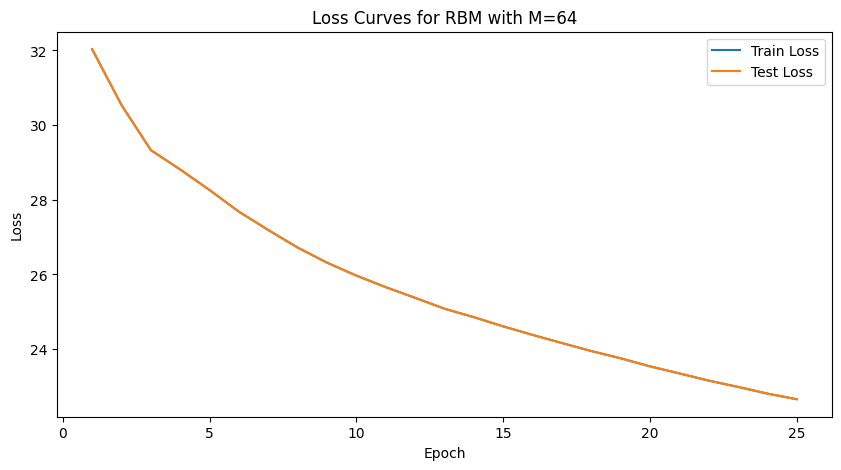

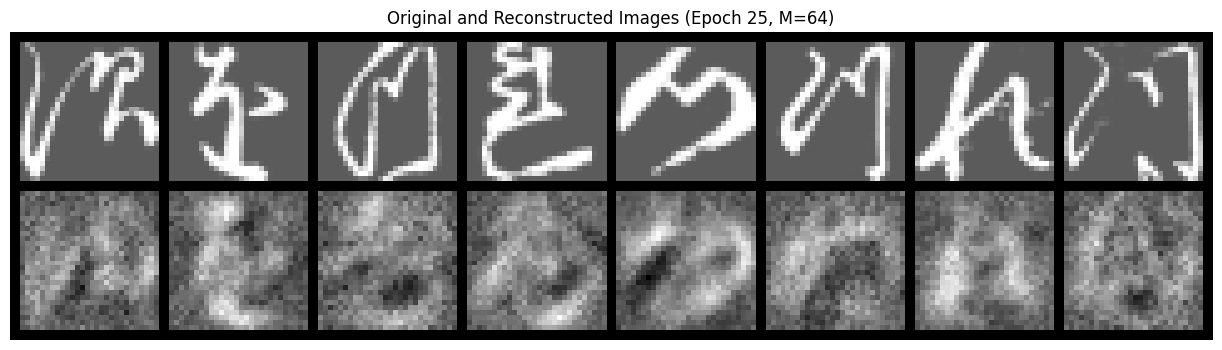

Learning rate: 0.0010


======================== Training RBM with M = 256 ========================



====> Epoch: 1 Average loss: 12.2577


====> Test set loss: 8.9877


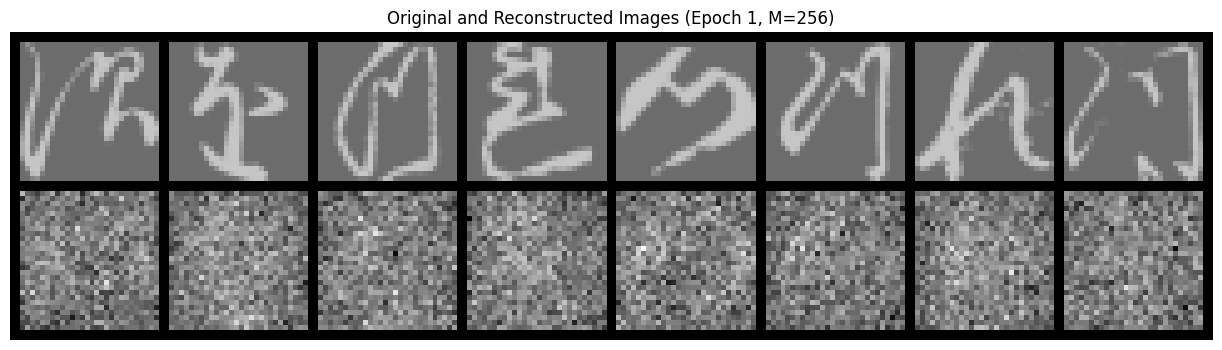

====> Epoch: 2 Average loss: 8.8778


====> Test set loss: 7.5456


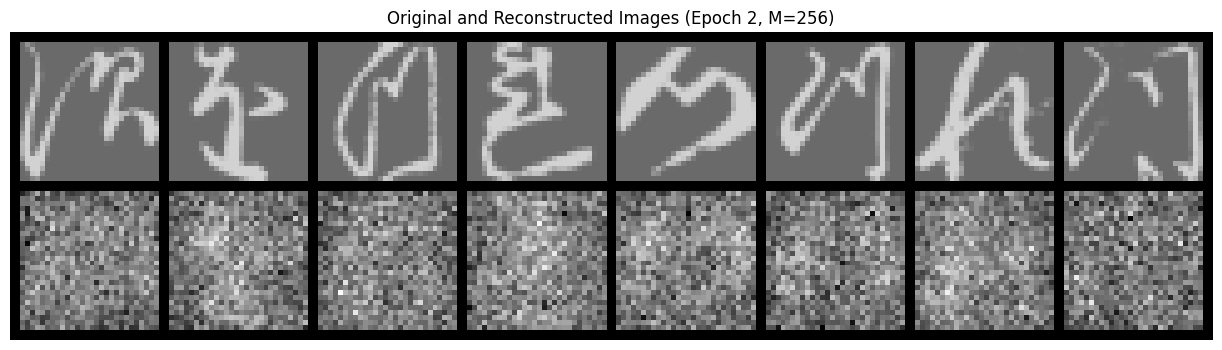

====> Epoch: 3 Average loss: 7.8507


====> Test set loss: 7.0517


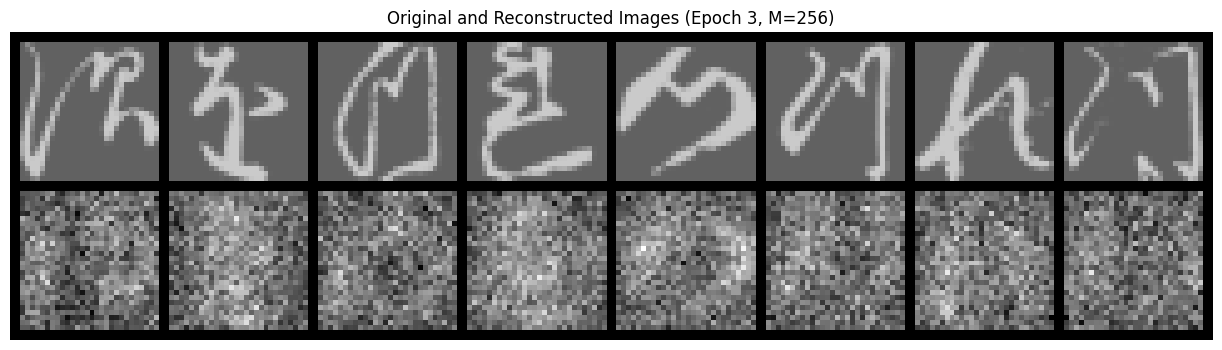

====> Epoch: 4 Average loss: 7.3043


====> Test set loss: 6.6810


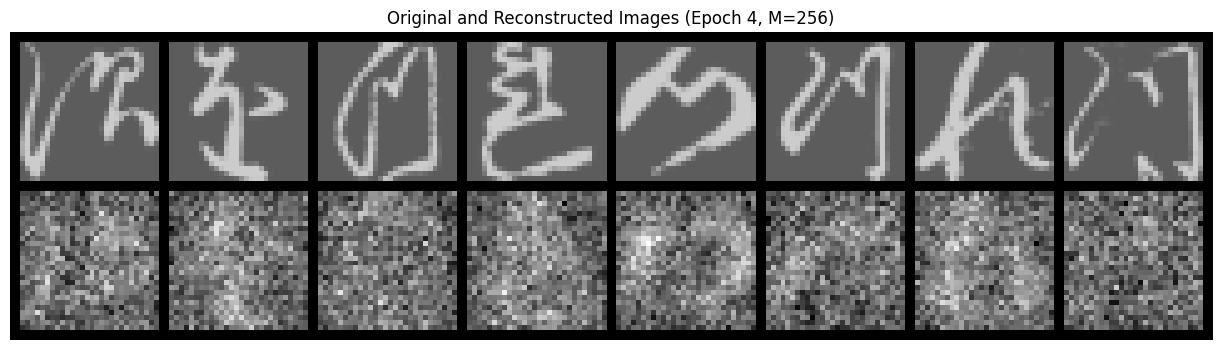

====> Epoch: 5 Average loss: 6.8675


====> Test set loss: 6.4477


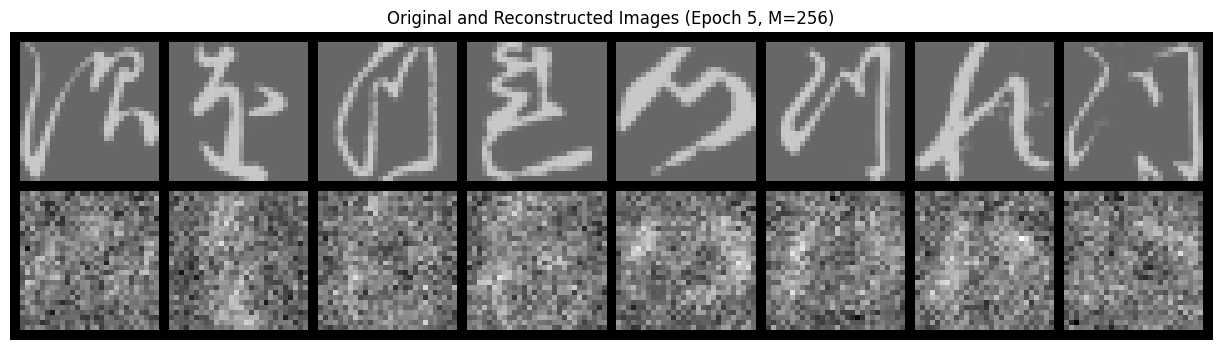

====> Epoch: 6 Average loss: 6.5238


====> Test set loss: 6.2442


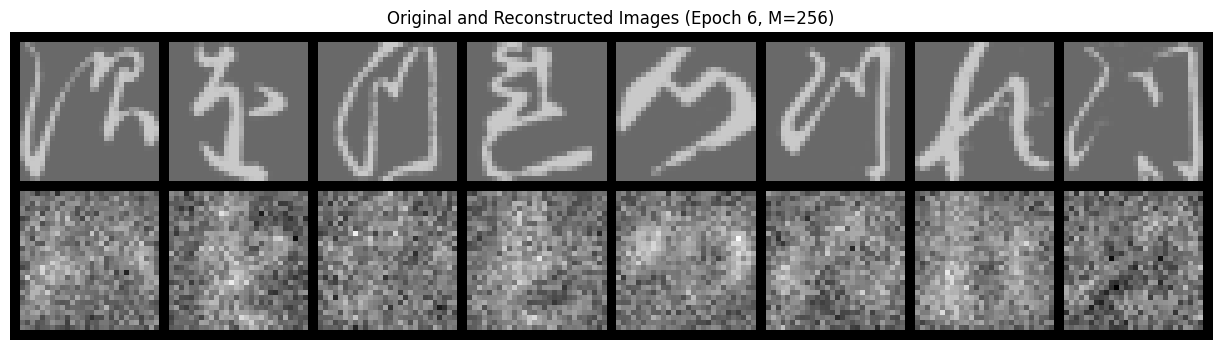

====> Epoch: 7 Average loss: 6.2585


====> Test set loss: 6.0960


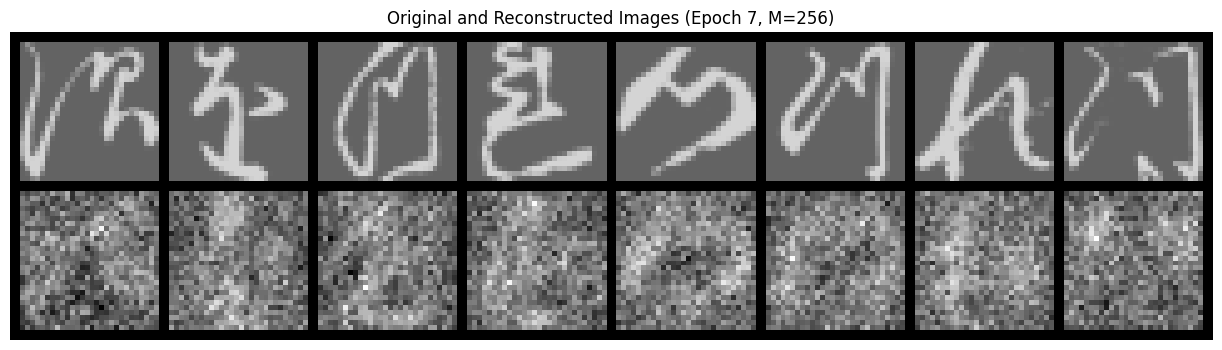

====> Epoch: 8 Average loss: 6.0451


====> Test set loss: 5.9768


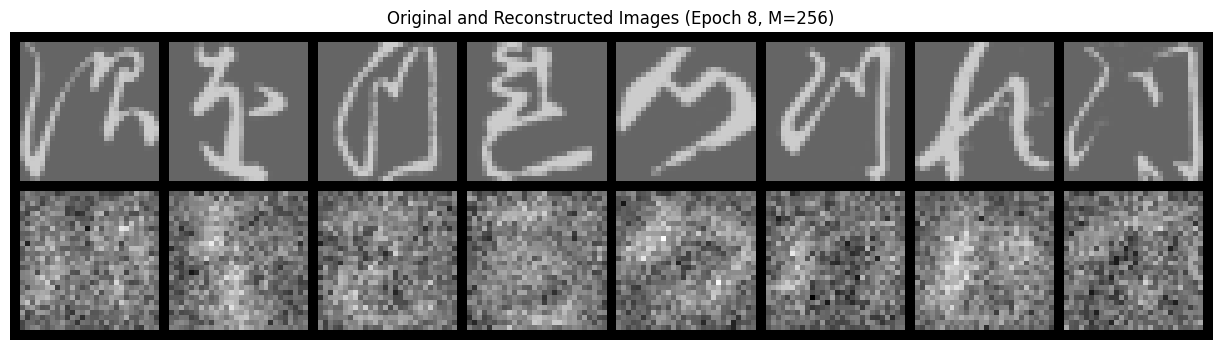

====> Epoch: 9 Average loss: 5.8521


====> Test set loss: 5.8802


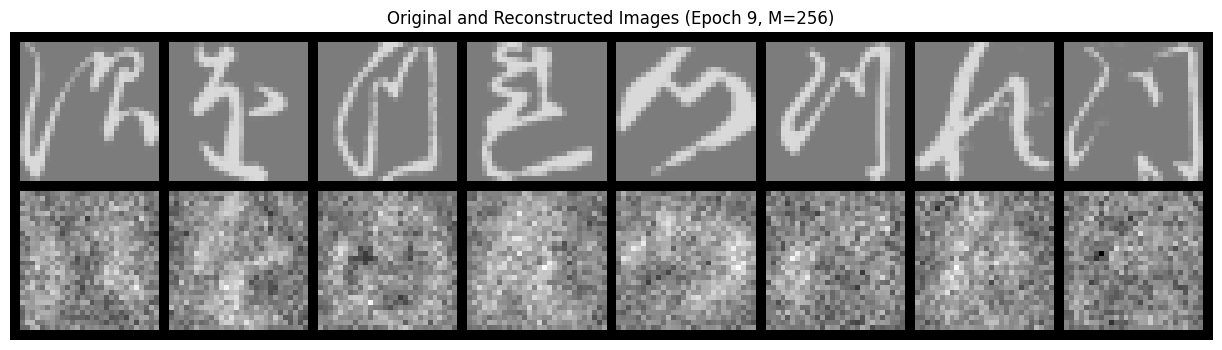

====> Epoch: 10 Average loss: 5.6906


====> Test set loss: 5.7789


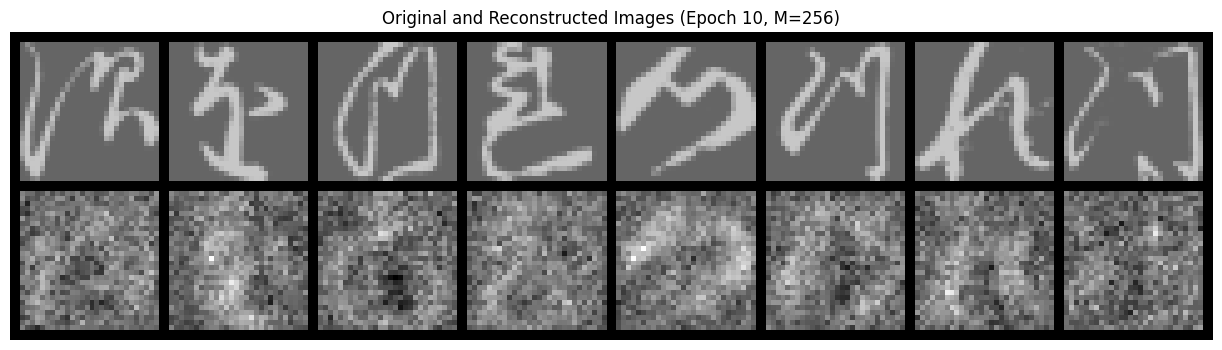

====> Epoch: 11 Average loss: 5.5402


====> Test set loss: 5.6811


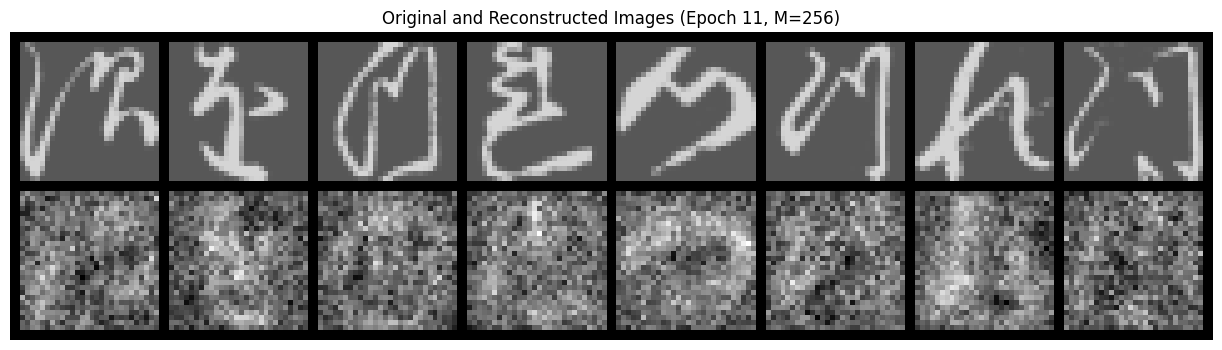

====> Epoch: 12 Average loss: 5.4097


====> Test set loss: 5.5949


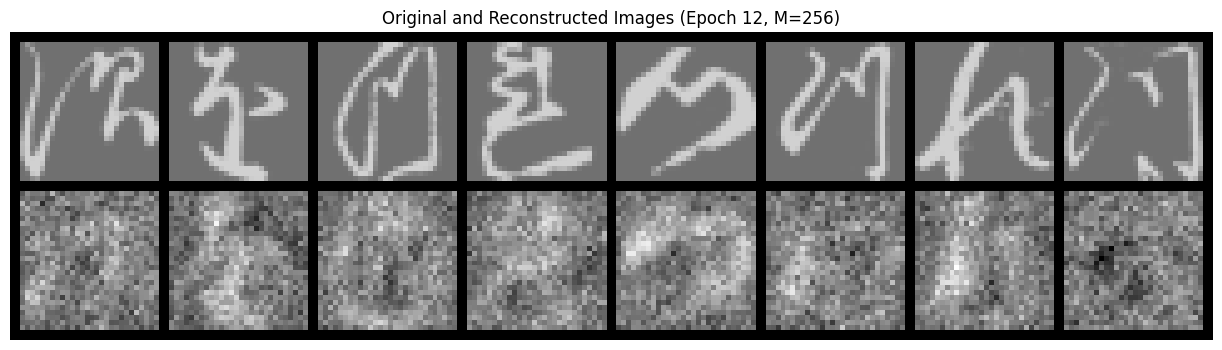

====> Epoch: 13 Average loss: 5.3188


====> Test set loss: 5.5072


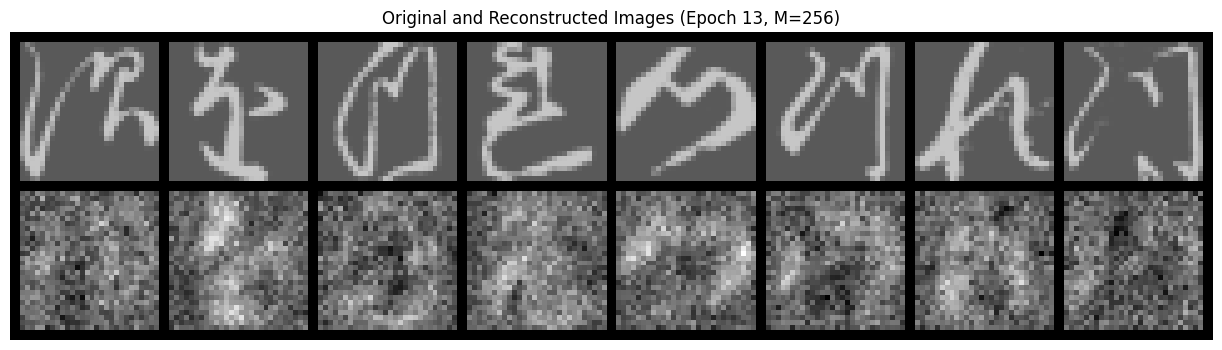

====> Epoch: 14 Average loss: 5.2169


====> Test set loss: 5.4685


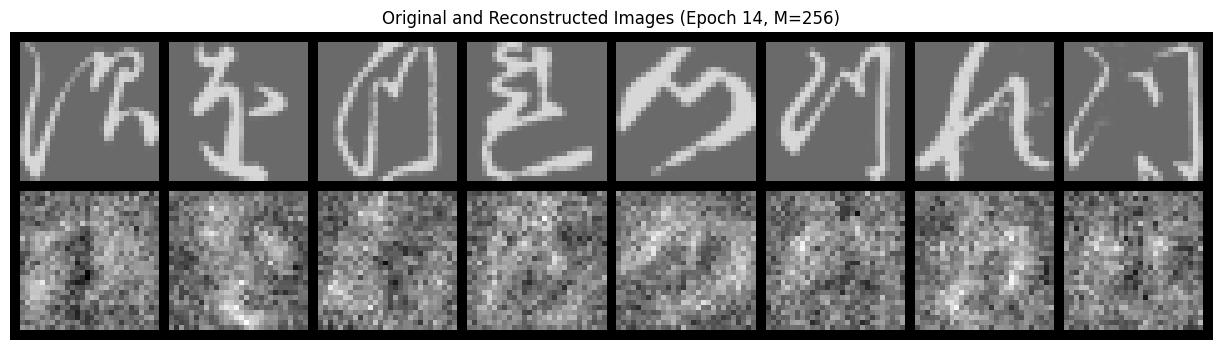

====> Epoch: 15 Average loss: 5.1319


====> Test set loss: 5.4130


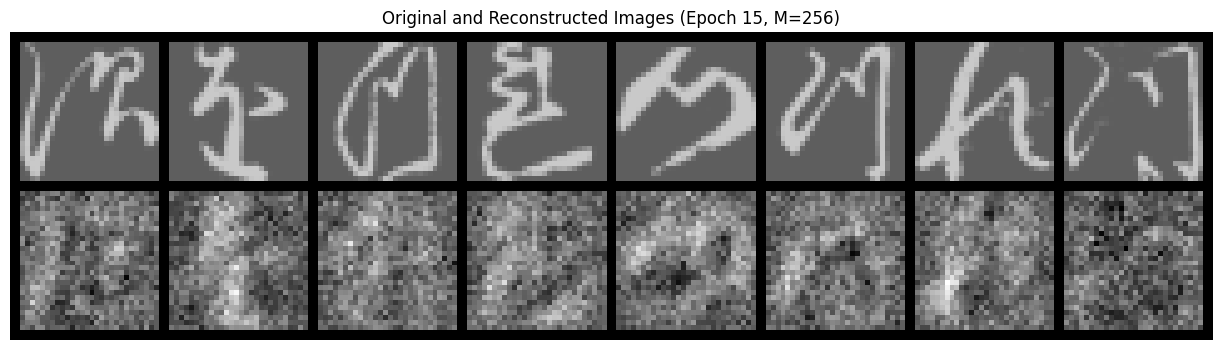

====> Epoch: 16 Average loss: 5.0662


====> Test set loss: 5.3727


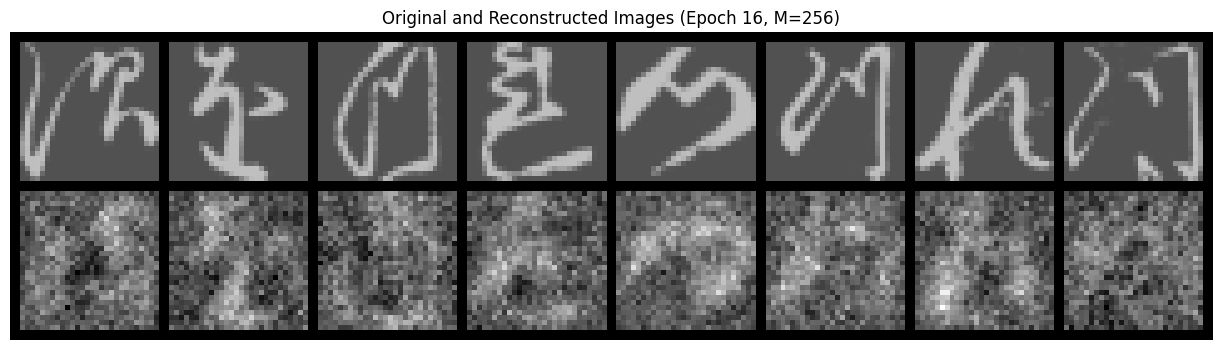

====> Epoch: 17 Average loss: 5.0077


====> Test set loss: 5.3324


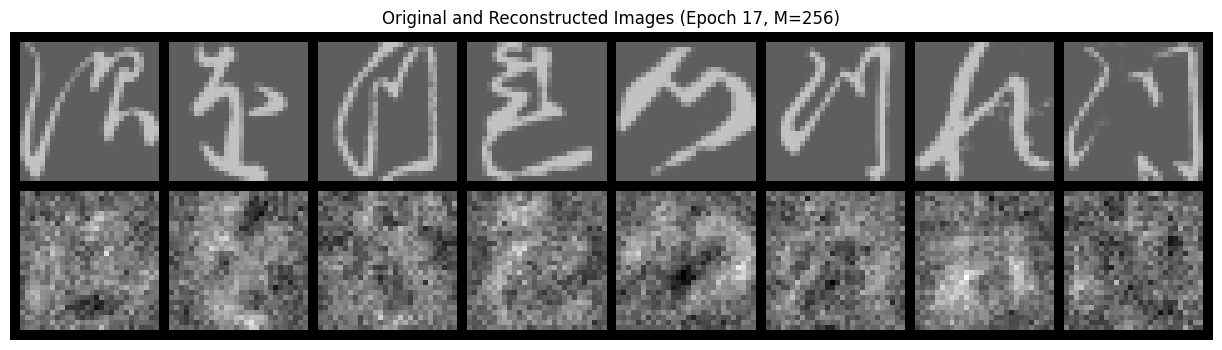

====> Epoch: 18 Average loss: 4.9627


====> Test set loss: 5.2852


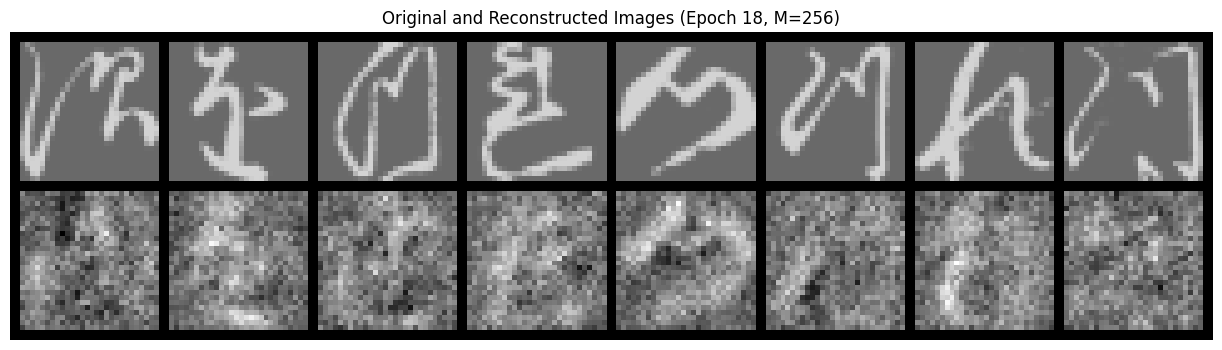

====> Epoch: 19 Average loss: 4.9167


====> Test set loss: 5.2922


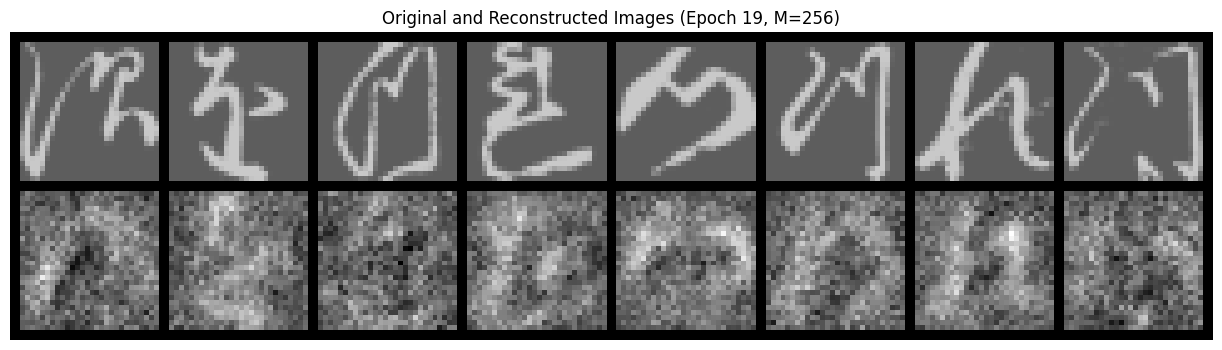

====> Epoch: 20 Average loss: 4.8806


====> Test set loss: 5.2476


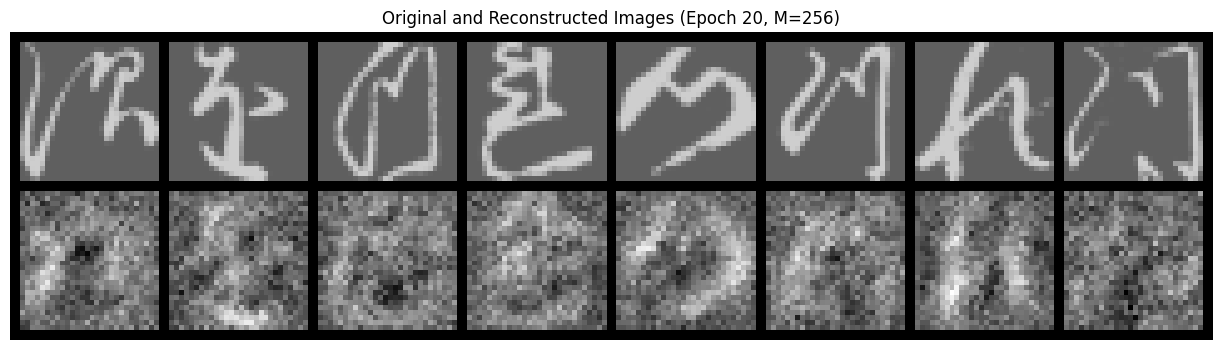

====> Epoch: 21 Average loss: 4.8623


====> Test set loss: 5.2476


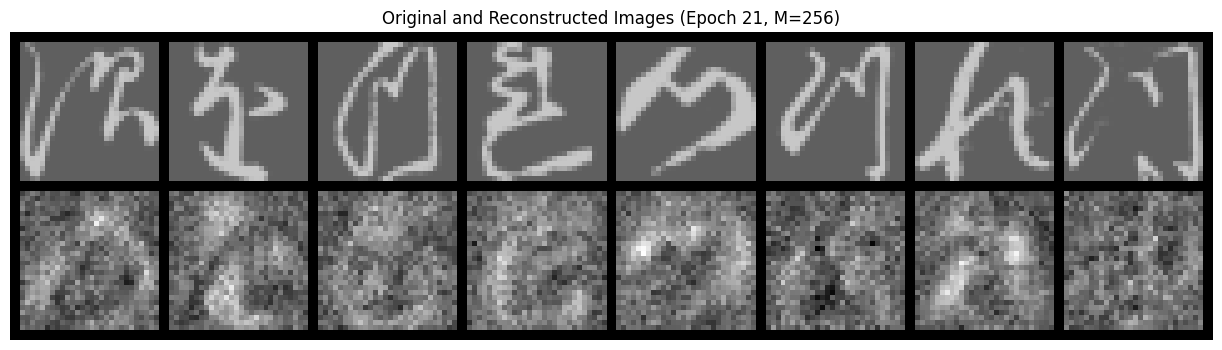

====> Epoch: 22 Average loss: 4.8397


====> Test set loss: 5.2330


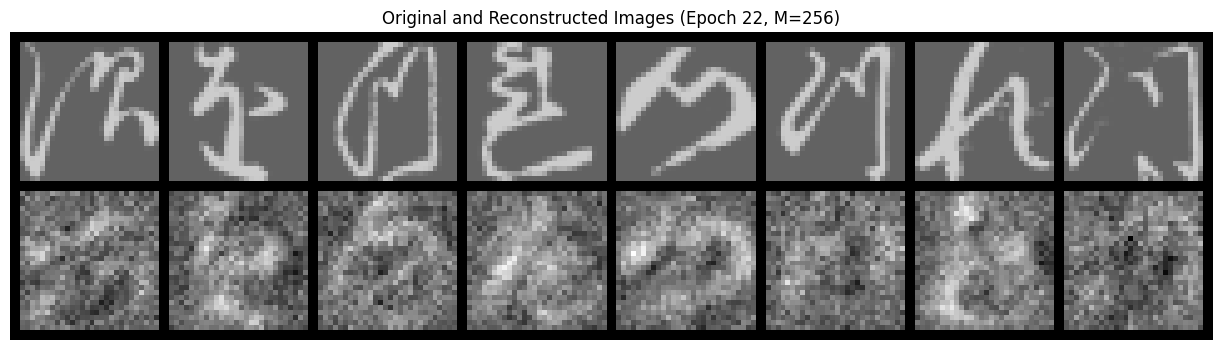

====> Epoch: 23 Average loss: 4.8135


====> Test set loss: 5.2021


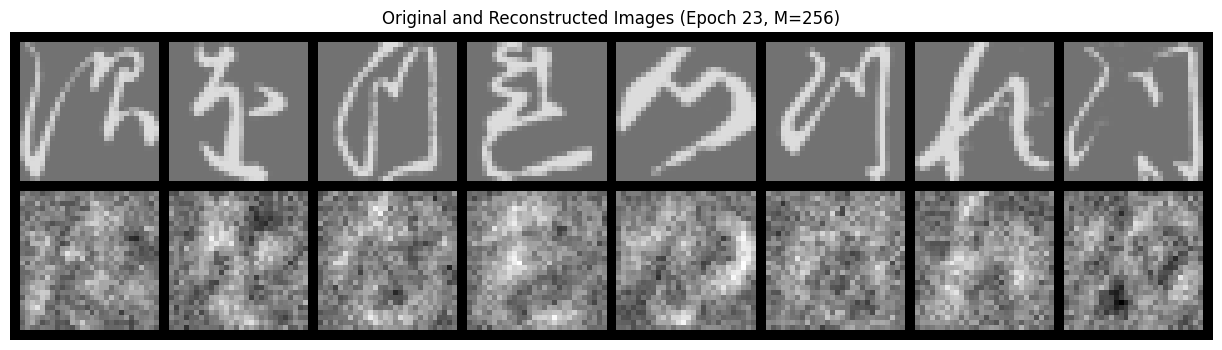

====> Epoch: 24 Average loss: 4.7988


====> Test set loss: 5.2162


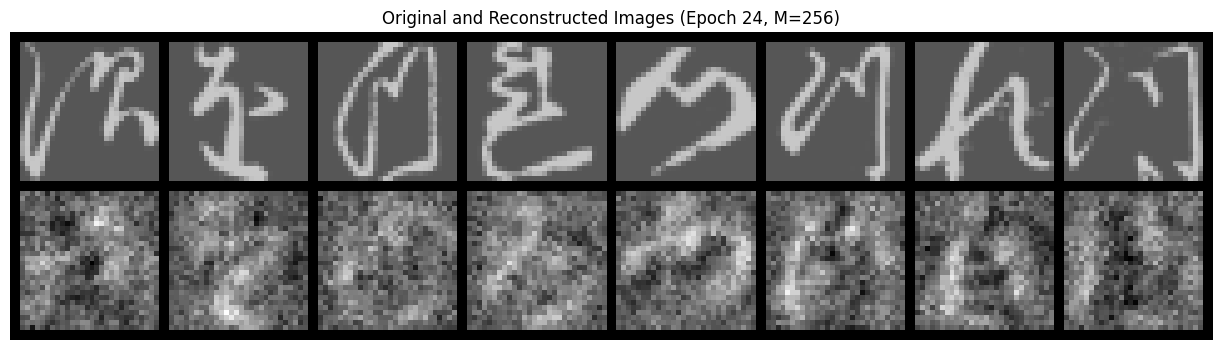

====> Epoch: 25 Average loss: 4.7883


====> Test set loss: 5.2163


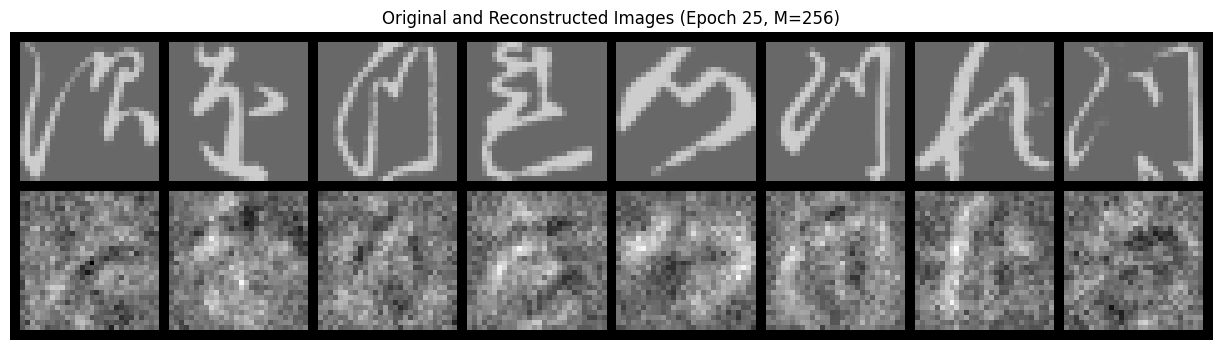

RBM with M=256: Train MSE: 81.2938, Test MSE: 83.4241


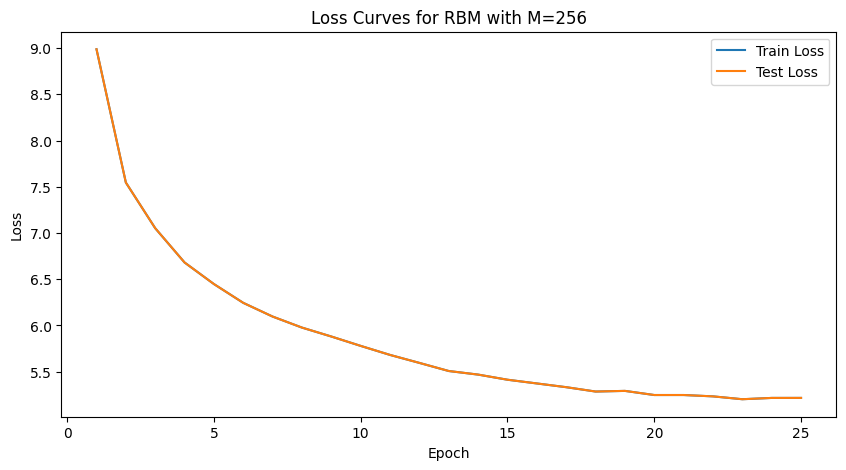

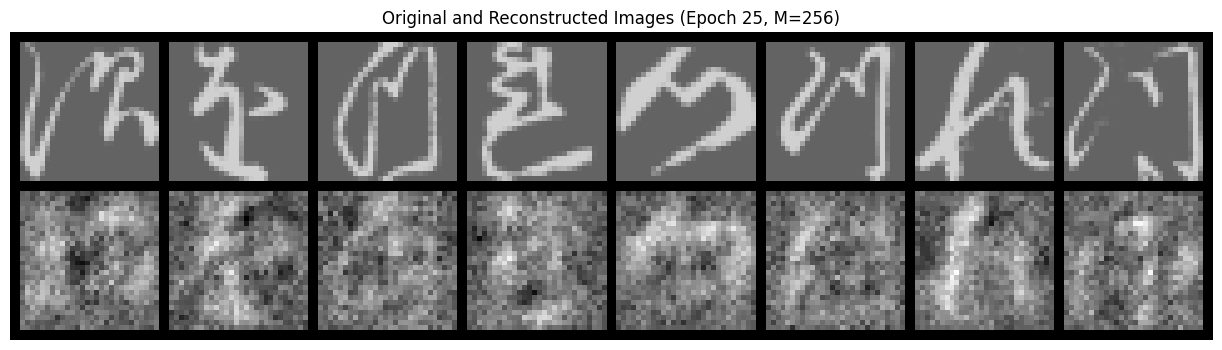

Learning rate: 0.0010



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import DataLoader
import random

from tqdm import tqdm  # Added tqdm

# Set random seeds for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Device configuration
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f'Using device: {device}')

# Hyperparameters
batch_size = 128
learning_rate = 1e-3
weight_decay = 0
num_epochs = 25
k = 1  # Number of Gibbs sampling steps
M_values = [16, 64, 256]  # Hidden layer sizes

# Data transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load KMNIST dataset
train_set = torchvision.datasets.KMNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.KMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)

# Define the Gaussian-Bernoulli RBM
class RBM(nn.Module):
    """Gaussian-Bernoulli Restricted Boltzmann Machine."""

    def __init__(self, visible_units: int, hidden_units: int, k: int):
        super(RBM, self).__init__()
        self.visible = visible_units
        self.hidden = hidden_units
        self.k = k

        # Initialize weights and biases
        self.W = nn.Parameter(torch.randn(hidden_units, visible_units) * 0.01)  # Weight matrix
        nn.init.xavier_uniform_(self.W)  # Xavier initialization
        self.c = nn.Parameter(torch.zeros(visible_units))  # Visible biases
        self.b = nn.Parameter(torch.zeros(hidden_units))  # Hidden biases

    def sample_h(self, v):
        """Sample hidden units given visible units."""
        p_h = torch.sigmoid(F.linear(v, self.W, self.b))
        return p_h, torch.bernoulli(p_h)

    def sample_v(self, h):
        """Sample visible units given hidden units."""
        v_mean = F.linear(h, self.W.t(), self.c)
        return v_mean, v_mean  # For Gaussian units, sampling is equivalent to the mean

    def free_energy(self, v):
        vbias_term = torch.sum((v - self.c) ** 2, dim=1) / 2
        wx_b = F.linear(v, self.W, self.b)
        hidden_term = torch.sum(F.softplus(wx_b), dim=1)  # Use softplus for numerical stability
        return vbias_term - hidden_term

    def forward(self, v):
        v_sample = v
        for _ in range(self.k):
            _, h_sample = self.sample_h(v_sample)
            v_mean, v_sample = self.sample_v(h_sample)
        return v_sample

def train_rbm(model, train_loader, lr, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch}', leave=False)):
        data = data.view(data.size(0), -1).to(device)

        # Positive phase
        p_h_v, h_sample = model.sample_h(data)

        # Negative phase
        v_sample = data
        for _ in range(model.k):
            _, h_sample = model.sample_h(v_sample)
            v_mean, v_sample = model.sample_v(h_sample)

        # Compute gradients
        positive_grad = torch.matmul(p_h_v.t(), data)
        p_h_model, _ = model.sample_h(v_sample)
        negative_grad = torch.matmul(p_h_model.t(), v_sample)

        # Update parameters
        model.W.data += lr * ((positive_grad - negative_grad) / data.size(0))
        model.b.data += lr * torch.mean(p_h_v - p_h_model, dim=0)
        model.c.data += lr * torch.mean(data - v_sample, dim=0)

        # Compute loss (free energy difference)
        loss = torch.mean(model.free_energy(data)) - torch.mean(model.free_energy(v_sample))
        train_loss += loss.item()

    avg_loss = train_loss / len(train_loader)
    print(f'====> Epoch: {epoch} Average loss: {avg_loss:.4f}')

def test_rbm(model, test_loader, epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in tqdm(test_loader, desc=f'Testing Epoch {epoch}', leave=False):
            data = data.view(data.size(0), -1).to(device)
            v_sample = model(data)
            loss = torch.mean(model.free_energy(data)) - torch.mean(model.free_energy(v_sample))
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader)
    print(f'====> Test set loss: {avg_test_loss:.4f}')
    return avg_test_loss

def reconstruct(model, data):
    with torch.no_grad():
        v_sample = model(data)
    return v_sample

def plot_reconstructions(original, reconstructed, epoch, M):
    original = original.view(-1, 1, 28, 28).cpu()
    reconstructed = reconstructed.view(-1, 1, 28, 28).cpu()
    comparison = torch.cat([original[:8], reconstructed[:8]])
    grid = make_grid(comparison, nrow=8, padding=2, normalize=True)

    plt.figure(figsize=(16, 4))
    plt.title(f'Original and Reconstructed Images (Epoch {epoch}, M={M})')
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.axis('off')
    plt.show()

def compute_mse(model, data_loader):
    model.eval()
    mse = 0
    count = 0
    with torch.no_grad():
        for data, _ in data_loader:
            data = data.view(data.size(0), -1).to(device)
            v_sample = model(data)
            mse += F.mse_loss(v_sample, data, reduction='sum').item()
            count += data.size(0)
    mse /= count
    return mse

# Training and Evaluation Loop for different M values
for M in M_values:
    print(f'\n======================== Training RBM with M = {M} ========================\n')
    rbm = RBM(visible_units=28*28, hidden_units=M, k=k).to(device)
    lr = learning_rate

    train_losses = []
    test_losses = []

    for epoch in range(1, num_epochs + 1):
        train_rbm(rbm, train_loader, lr, epoch)
        test_loss = test_rbm(rbm, test_loader, epoch)
        train_losses.append(test_loss)  # Using test loss as a placeholder
        test_losses.append(test_loss)

        # Reconstruct and visualize
        data, _ = next(iter(test_loader))
        data = data[:32]
        data = data.view(data.size(0), -1).to(device)
        reconstructed = reconstruct(rbm, data)
        plot_reconstructions(data, reconstructed, epoch, M)

    # Compute MSE for train and test sets
    train_mse = compute_mse(rbm, train_loader)
    test_mse = compute_mse(rbm, test_loader)
    print(f'RBM with M={M}: Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

    # Plotting the loss curves
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(10,5))
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, test_losses, label='Test Loss')
    plt.title(f'Loss Curves for RBM with M={M}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Reconstruct and visualize final epoch
    data, _ = next(iter(test_loader))
    data = data[:32]
    data = data.view(data.size(0), -1).to(device)
    reconstructed = reconstruct(rbm, data)
    plot_reconstructions(data, reconstructed, num_epochs, M)

    print(f'Learning rate: {lr:.4f}\n')